In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pour voir toute la colonne commentaire
pd.set_option('max_colwidth', 120)
# pour voir toutes les colonnes
pd.set_option('max_columns', None)
#pour voir plein de lignes
pd.options.display.max_rows = 5000

In [3]:
import time

In [4]:
start = time.time()
d16 = pd.read_csv('d16_clean.csv')
end = time.time()
print("total time: ",(end - start),"sec")

total time:  0.023984909057617188 sec


# Partie 4 - ML

#### Sélection de quasi toutes les données et retrait des nan

In [5]:
mll = d16[['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseType',
           'YearBuilt',
           'CouncilDistrictCode', 'Neighborhood',   
           'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
           'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
           'ENERGYSTARScore',
           'SiteEnergyUse(kBtu)']]

mll = mll.dropna(subset = ['SiteEnergyUse(kBtu)'])
mll.isna().mean()*100

BuildingType                        0.000000
PrimaryPropertyType                 0.000000
LargestPropertyUseType              0.000000
SecondLargestPropertyUseType        0.000000
ThirdLargestPropertyUseType         0.000000
YearBuilt                           0.000000
CouncilDistrictCode                 0.000000
Neighborhood                        0.000000
NumberofBuildings                   0.000000
NumberofFloors                      0.000000
PropertyGFATotal                    0.000000
PropertyGFAParking                  0.000000
PropertyGFABuilding(s)              0.000000
LargestPropertyUseTypeGFA           0.000000
SecondLargestPropertyUseTypeGFA     0.000000
ThirdLargestPropertyUseTypeGFA      0.000000
ENERGYSTARScore                    32.321981
SiteEnergyUse(kBtu)                 0.000000
dtype: float64

In [6]:
X = mll.drop(['SiteEnergyUse(kBtu)','ENERGYSTARScore'], axis=1)
y = mll['SiteEnergyUse(kBtu)']

In [7]:
##e
mlle = mll.dropna(subset = ["ENERGYSTARScore"], axis = 0)
Xe = mlle.drop(['SiteEnergyUse(kBtu)'], axis=1)
ye = mlle['SiteEnergyUse(kBtu)']

## Pipeline !

In [8]:
from sklearn.pipeline import make_pipeline

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_selector
#make column selector ça à l'air cool aussi, à travailler (surtout si on a bcp de variable, à partir de 0.22 de scikit)
#make_column_selector(dtype_include=np.number) pour sélectionner les var num par ex

In [10]:
mll.head(1)

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearBuilt,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu)
0,NonResidential,Hotel,Hotel,None,None,1927.0,7.0,DOWNTOWN,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.0,7226362.5


In [11]:
donnees_quali = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType',
                 'ThirdLargestPropertyUseType', 'Neighborhood']
donnees_quanti_avecE = ['YearBuilt', 'CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                  'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
                  'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore']
donnees_quanti_sansE = donnees_quanti_avecE.copy()
donnees_quanti_sansE.remove('ENERGYSTARScore')

In [12]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [13]:
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'))
#Version avec SimpleImputer() pour remplacer les valeurs manquantes
#categorical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
numerical_pipeline = make_pipeline(RobustScaler())

In [14]:
prepros = make_column_transformer((numerical_pipeline, donnees_quanti_sansE), (categorical_pipeline, donnees_quali))
#with energyscore
prepros_avec_e = make_column_transformer((numerical_pipeline, donnees_quanti_avecE), (categorical_pipeline, donnees_quali))

In [15]:
X.head(1)

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearBuilt,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,NonResidential,Hotel,Hotel,None,None,1927.0,7.0,DOWNTOWN,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0


In [16]:
#split train/test
from sklearn import model_selection

In [17]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

### avec Energystar

In [18]:
X_traine, X_teste, y_traine, y_teste = \
    model_selection.train_test_split(Xe, ye, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

## LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = make_pipeline(prepros, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['YearBuilt',
                                                   'CouncilDistrictCode',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLarges

In [21]:
#model.get_params().keys()

In [22]:
#Cross-validation evaluation of Supervised algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

In [23]:
#simple performance reporting function
def clf_performance(classifier, model_name) :
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [24]:
start = time.time()

model = make_pipeline(prepros, LinearRegression())

params = {
    'linearregression__fit_intercept' : [True, False],
    'linearregression__n_jobs' : [1, 2, None]   
}


model.fit(X_train, y_train)
print(model.score(X_test, y_test))

clf_lin = GridSearchCV(model, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_lin = clf_lin.fit(X_train, y_train)
    
clf_performance(best_clf_lin, 'LinearRegression')

end = time.time()
print("total time: ",(end - start),"sec")

0.3407033803660484
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LinearRegression
Best Score: -0.10477179652564506
Best Parameters: {'linearregression__fit_intercept': True, 'linearregression__n_jobs': 1}
total time:  2.833954334259033 sec


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished


In [25]:
model = make_pipeline(prepros, LinearRegression(fit_intercept = True, n_jobs = None))

model.fit(X_train, y_train)
print('train :', model.score(X_train, y_train))
print('test :', model.score(X_test, y_test))

train : 0.8229381058690298
test : 0.3407033803660484


In [26]:
model = make_pipeline(prepros, LinearRegression(fit_intercept = False, n_jobs = 1))

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.3398424353844317


Feature: 0, Score: 1383480.83032
Feature: 1, Score: 1342346.11511
Feature: 2, Score: 1384358.34668
Feature: 3, Score: 165938.19502
Feature: 4, Score: -3215199.44458
Feature: 5, Score: -65.68315
Feature: 6, Score: -3217171.74487
Feature: 7, Score: 9150142.38756
Feature: 8, Score: 1841735.81048
Feature: 9, Score: 367.20966
Feature: 10, Score: 4952528.51872
Feature: 11, Score: 4382722.36796
Feature: 12, Score: 2846480.02248
Feature: 13, Score: 4395385.20820
Feature: 14, Score: -338677.75576
Feature: 15, Score: 45058027.30651
Feature: 16, Score: 10717197.52844
Feature: 17, Score: -3618444.20613
Feature: 18, Score: 15484536.97650
Feature: 19, Score: -5486555.73660
Feature: 20, Score: -1177105.05060
Feature: 21, Score: 4026902.12976
Feature: 22, Score: 837878.29735
Feature: 23, Score: 1156449.05996
Feature: 24, Score: -62568.37499
Feature: 25, Score: -1727039.79670
Feature: 26, Score: -2147547.76784
Feature: 27, Score: -28212677.10355
Feature: 28, Score: -4734173.17413
Feature: 29, Score: -9

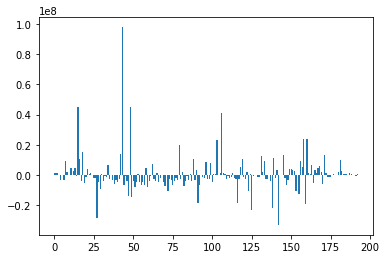

In [27]:
importance = model.named_steps['linearregression'].coef_

#onehotstep = model['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder']
#onehotstep.inverse_transform(importance)



for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [28]:
X_train.columns

Index(['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearBuilt', 'CouncilDistrictCode', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

#### version dé enco oneHot à la main

In [29]:
post = [5, 23, 54, 47, 34, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1]

coeffsum = []
start = 0
end = post[0]
valeur = 0

for i in range(len(X_train.columns)) :
    for y in range(start, end) :
        valeur = valeur + model.named_steps['linearregression'].coef_[y]
    coeffsum.append(valeur/(end-start))
    start = start + post[i]
    end = end + post[i+1]
    #print('start :', start, '/ end :', end)
    valeur = 0

print(coeffsum)

[212184.80851002046, 2559239.113191176, 171436.9750834632, -207098.3564714043, 209996.29741508866, 6512572.971636868, -5426639.283153807, 1987556.1534466853, 469320.1231899025, 403968.5347068153, -88226.70212498834, 1125263.5156211718, 408772.53090157453, 39817.3749345366, 360971.1817655708, -518703.9867473488]


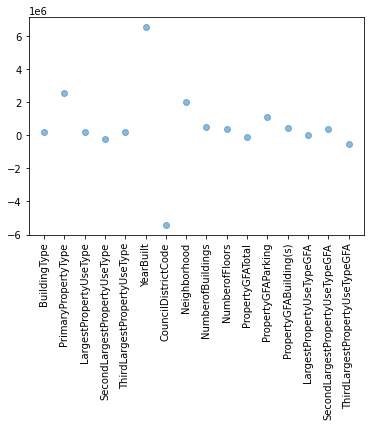

In [30]:
a = X_train.columns.tolist()
b = coeffsum
plt.plot(a, b, 'o',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [31]:
#### avec energystar

In [32]:
start = time.time()

modele = make_pipeline(prepros_avec_e, LinearRegression())

params = {
    'linearregression__fit_intercept' : [True, False],
    'linearregression__n_jobs' : [1, 2, None]   
}


modele.fit(X_traine, y_traine)
print(modele.score(X_teste, y_teste))

clf_lin = GridSearchCV(modele, param_grid = params, cv = KFold(3), verbose = True, n_jobs = -1)
best_clf_lin = clf_lin.fit(X_traine, y_traine)

#simple performance reporting function
def clf_performance(classifier, model_name) :
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
    
clf_performance(best_clf_lin, 'LinearRegression')

end = time.time()
print("total time: ",(end - start),"sec")

0.48905266124521296
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LinearRegression
Best Score: 0.5402171595705324
Best Parameters: {'linearregression__fit_intercept': True, 'linearregression__n_jobs': 1}
total time:  0.45255470275878906 sec


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


In [33]:
modele = make_pipeline(prepros_avec_e, LinearRegression(fit_intercept = True, n_jobs = 1))

modele.fit(X_traine, y_traine)
print('train :', modele.score(X_traine, y_traine))
print('test :', modele.score(X_teste, y_teste))

train : 0.9021468912543079
test : 0.48905266124521296


## Création de nouvelles variables

#### Age de batîment

In [34]:
d16['Age'] = 2016 - d16['YearBuilt']

#### Avec ou sans Second Property Use

In [35]:
d16['SecondLargestPropertyUseType'].value_counts()

None                                                    776
Parking                                                 332
Office                                                  165
Retail Store                                             84
Other                                                    43
Non-Refrigerated Warehouse                               31
Restaurant                                               29
Fitness Center/Health Club/Gym                           16
Multifamily Housing                                      11
Other - Services                                         10
Supermarket/Grocery Store                                10
Data Center                                              10
Medical Office                                            9
Bank Branch                                               7
Distribution Center                                       6
Other - Entertainment/Public Assembly                     6
Laboratory                              

In [36]:
condition = [
    (d16["SecondLargestPropertyUseType"] == 'None')
]

choice = [0]

d16['Second_Type'] = np.select(condlist= condition, choicelist=choice, default=1)


##

condition = [
    (d16["ThirdLargestPropertyUseType"] == 'None')
]

choice = [0]

d16['Third_Type'] = np.select(condlist= condition, choicelist=choice, default=1)

In [37]:
d16.head(3)

,Unnamed: 0,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,SPDMCPPA,SPD Beats,Latitude,Longitude,City,State,Address,Zip Codes,sommmeGFA,diffGFA,Sommest,diffest,Parking,NLarge,Age,Second_Type,Third_Type
0,0,1,NonResidential,Hotel,mayflower park hotel,659000030.0,7.0,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,Hotel,Hotel,88434.0,None,0.0,None,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,0.0,249.98,2.83,False,Compliant,14.0,31.0,47.61220,-122.33799,Seattle,WA,405 Olive way,98101.0,88434.0,0.0,88434.0,0.0,0,1,89.0,0,0
1,1,2,NonResidential,Hotel,paramount hotel,659000220.0,7.0,DOWNTOWN,1996.0,1.0,11.0,103566.0,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,0.0,295.86,2.86,False,Compliant,14.0,31.0,47.61317,-122.33393,Seattle,WA,724 Pine street,98101.0,103566.0,0.0,103566.0,0.0,1,3,20.0,1,1
2,2,3,NonResidential,Hotel,5673-the westin seattle,659000475.0,7.0,DOWNTOWN,1969.0,1.0,41.0,956110.0,196718.0,759392.0,Hotel,Hotel,756493.0,Parking,100000.0,Swimming Pool,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,0.0,2089.28,2.19,False,Compliant,56.0,31.0,47.61393,-122.33810,Seattle,WA,1900 5th Avenue,98101.0,956110.0,0.0,856493.0,99617.0,1,2,47.0,1,1


#### Primary property Type Use

In [38]:
print('Différents types de Building :', len(d16['BuildingType'].unique()))
print('--'*5)
print('Différents types de Primary Property Type :', len(d16['PrimaryPropertyType'].unique()))
print('--'*5)
print('Différents types de Largest Property Use Type :', len(d16['LargestPropertyUseType'].unique()))
print('--'*5)
print('Différents types de Second Largest Property Use Type :', len(d16['SecondLargestPropertyUseType'].unique()))
print('--'*5)
print('Différents types de Third Largest Property Use Type :', len(d16['ThirdLargestPropertyUseType'].unique()))

Différents types de Building : 5
----------
Différents types de Primary Property Type : 24
----------
Différents types de Largest Property Use Type : 56
----------
Différents types de Second Largest Property Use Type : 48
----------
Différents types de Third Largest Property Use Type : 39


In [39]:
d16['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    282
Other                          248
Warehouse                      185
Large Office                   165
K-12 School                    122
Mixed Use Property             112
Retail Store                    89
Hotel                           72
Worship Facility                71
Distribution Center             53
Medical Office                  39
Supermarket / Grocery Store     39
Self-Storage Facility           27
University                      23
Senior Care Community           20
Residence Hall                  17
Refrigerated Warehouse          12
Restaurant                      11
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             3
Office                           3
Non-Refrigerated Warehouse       1
Restaurant\n                     1
Name: PrimaryPropertyType, dtype: int64

In [40]:
#d16['LargestPropertyUseType'].value_counts()

#### On a trop peu de catégorie avec BuildingTYpe et beaucoup trop de petite taille d'échantillon chez Largest, Je vais donc travailler avec Primary, en essayant de garder une taille minimale de 26 (20% et oui c'est arbitraire !)

In [41]:
d16['Prop_Type'] = d16['PrimaryPropertyType']

In [42]:
condition = [
    d16['Prop_Type'] == 'Restaurant\n',
    d16['Prop_Type'] == 'Non-Refrigerated Warehouse',
    d16['Prop_Type'] == 'Low-Rise Multifamily',
    d16['Prop_Type'] == 'Office',
    d16['Prop_Type'] == 'Hospital',
    d16['Prop_Type'] == 'Laboratory',
    d16['Prop_Type'] == 'Restaurant',
    d16['Prop_Type'] == 'Refrigerated Warehouse',
    d16['Prop_Type'] == 'Residence Hall',
    d16['Prop_Type'] == 'Senior Care Community'
]

choice = ['Hotel', 'Warehouse', 'Mixed Use Property', 'Large Office', 'Medical Office', 'University',
          'Hotel', 'Warehouse', 'University', 'Medical Office']

d16['Prop_Type'] = np.select(condlist= condition, choicelist=choice, default=d16['Prop_Type'])

In [43]:
d16['Prop_Type'].value_counts()

Small- and Mid-Sized Office    282
Other                          248
Warehouse                      198
Large Office                   168
K-12 School                    122
Mixed Use Property             115
Retail Store                    89
Hotel                           84
Worship Facility                71
Medical Office                  69
Distribution Center             53
University                      50
Supermarket / Grocery Store     39
Self-Storage Facility           27
Name: Prop_Type, dtype: int64

In [44]:
d16.head(2)

,Unnamed: 0,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,SPDMCPPA,SPD Beats,Latitude,Longitude,City,State,Address,Zip Codes,sommmeGFA,diffGFA,Sommest,diffest,Parking,NLarge,Age,Second_Type,Third_Type,Prop_Type
0,0,1,NonResidential,Hotel,mayflower park hotel,659000030.0,7.0,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,Hotel,Hotel,88434.0,None,0.0,None,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,0.0,249.98,2.83,False,Compliant,14.0,31.0,47.61220,-122.33799,Seattle,WA,405 Olive way,98101.0,88434.0,0.0,88434.0,0.0,0,1,89.0,0,0,Hotel
1,1,2,NonResidential,Hotel,paramount hotel,659000220.0,7.0,DOWNTOWN,1996.0,1.0,11.0,103566.0,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,0.0,295.86,2.86,False,Compliant,14.0,31.0,47.61317,-122.33393,Seattle,WA,724 Pine street,98101.0,103566.0,0.0,103566.0,0.0,1,3,20.0,1,1,Hotel


#### log des targets

In [45]:
d16['logEner'] = np.log1p(d16['SiteEnergyUse(kBtu)'])
d16['logGHG'] = np.log1p(d16['GHGEmissions(MetricTonsCO2e)'])

#### Nouvelle colonne % d'E

In [46]:
pourcent = d16[['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']].copy()
pourcent['somme'] = pourcent[list(pourcent)[1]] + pourcent[list(pourcent)[2]] + pourcent[list(pourcent)[3]] + pourcent[list(pourcent)[4]]
pourcent['diff'] = pourcent[list(pourcent)[0]] - pourcent[list(pourcent)[-1]]
print(pourcent.head(3))
pourcent.describe()

   SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0            7226362.5       2003882.0          3946027.0         1276453.0   
1            8387933.0             0.0          3242851.0         5145082.0   
2           72587024.0      21566554.0         49526664.0         1493800.0   

   OtherFuelUse(kBtu)       somme  diff  
0                 0.0   7226362.0   0.5  
1                 0.0   8387933.0   0.0  
2                 0.0  72587018.0   6.0  


,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),somme,diff
count,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.573000e+03,1.573000e+03,1.573000e+03
mean,7.973357e+06,4.768808e+05,5.442887e+06,2.019405e+06,1.491585e+04,7.690476e+06,5.028642e+03
std,2.207796e+07,5.203277e+06,1.350032e+07,9.689171e+06,2.853716e+05,1.933009e+07,5.091763e+05
min,1.680890e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.680900e+04,-4.330658e+06
25%,1.249843e+06,0.000000e+00,7.271515e+05,0.000000e+00,0.000000e+00,1.257033e+06,0.000000e+00
50%,2.556131e+06,0.000000e+00,1.611215e+06,5.150350e+05,0.000000e+00,2.547662e+06,2.500000e-01
75%,6.792358e+06,0.000000e+00,4.777084e+06,1.517566e+06,0.000000e+00,6.782435e+06,7.500000e-01
max,4.483853e+08,1.349435e+08,2.745325e+08,2.979090e+08,8.269669e+06,2.930908e+08,1.865652e+07


In [47]:
pourcent.loc[pourcent['diff'] <0]

,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),somme,diff
24,5.328052e+06,0.000000e+00,572307.0,4755745.0,0.0,5.328052e+06,-5.000000e-01
30,3.183648e+05,0.000000e+00,281265.0,37100.0,0.0,3.183650e+05,-1.875000e-01
63,2.365898e+07,6.093150e+06,14419146.0,688680.0,6464408.0,2.766538e+07,-4.006406e+06
65,2.095503e+07,9.763690e+06,7252325.0,0.0,8269669.0,2.528568e+07,-4.330658e+06
67,2.726369e+06,1.202380e+06,1293349.0,0.0,337952.0,2.833681e+06,-1.073120e+05
69,2.072325e+07,5.137220e+06,13512686.0,0.0,2944419.0,2.159432e+07,-8.710770e+05
73,5.155568e+06,0.000000e+00,2637011.0,2518558.0,0.0,5.155569e+06,-5.000000e-01
76,6.219842e+06,0.000000e+00,1887893.0,4331949.0,0.0,6.219842e+06,-5.000000e-01
78,6.456026e+06,0.000000e+00,2262820.0,4193207.0,0.0,6.456027e+06,-1.000000e+00
84,3.894584e+06,0.000000e+00,1775488.0,2119097.0,0.0,3.894585e+06,-5.000000e-01


In [48]:
pourcent['Steam(%)'] = pourcent['SteamUse(kBtu)'] / pourcent['somme'] * 100
pourcent['Elec(%)'] = pourcent['Electricity(kBtu)'] / pourcent['somme'] * 100
pourcent['Gas(%)'] = pourcent['NaturalGas(kBtu)'] / pourcent['somme'] * 100
pourcent['Other(%)'] = pourcent['OtherFuelUse(kBtu)'] / pourcent['somme'] * 100

pourcent.head(1)

,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),somme,diff,Steam(%),Elec(%),Gas(%),Other(%)
0,7226362.5,2003882.0,3946027.0,1276453.0,0.0,7226362.0,0.5,27.730164,54.605997,17.66384,0.0


In [49]:
d16[['Steam(%)', 'Elec(%)', 'Gas(%)', 'Other(%)']] = pourcent[['Steam(%)', 'Elec(%)', 'Gas(%)', 'Other(%)']]

In [50]:
d16.head(1)

,Unnamed: 0,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,SPDMCPPA,SPD Beats,Latitude,Longitude,City,State,Address,Zip Codes,sommmeGFA,diffGFA,Sommest,diffest,Parking,NLarge,Age,Second_Type,Third_Type,Prop_Type,logEner,logGHG,Steam(%),Elec(%),Gas(%),Other(%)
0,0,1,NonResidential,Hotel,mayflower park hotel,659000030.0,7.0,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,Hotel,Hotel,88434.0,None,0.0,None,0.0,60.0,81.699997,84.300003,182.5,189.0,7226362.5,7456910.0,2003882.0,1156514.25,3946027.0,12764.5293,1276453.0,0.0,249.98,2.83,False,Compliant,14.0,31.0,47.6122,-122.33799,Seattle,WA,405 Olive way,98101.0,88434.0,0.0,88434.0,0.0,0,1,89.0,0,0,Hotel,15.793246,5.525373,27.730164,54.605997,17.66384,0.0


## Nouvelle sélection de variables

In [51]:
machl = d16[['PrimaryPropertyType', 'Second_Type', 'Prop_Type',
             'Age',   
             'NumberofFloors', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
             'ENERGYSTARScore',
             'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
             'logEner', 'logGHG',
             'NumberofBuildings', 'Parking',
             'Steam(%)', 'Elec(%)', 'Gas(%)', 'Other(%)'
            ]]

In [52]:
machl.shape

(1615, 19)

In [53]:
machl.isna().mean()*100

PrimaryPropertyType                 0.000000
Second_Type                         0.000000
Prop_Type                           0.000000
Age                                 0.000000
NumberofFloors                      0.000000
LargestPropertyUseTypeGFA           0.000000
SecondLargestPropertyUseTypeGFA     0.000000
ThirdLargestPropertyUseTypeGFA      0.000000
ENERGYSTARScore                    32.321981
SiteEnergyUse(kBtu)                 0.000000
GHGEmissions(MetricTonsCO2e)        0.000000
logEner                             0.000000
logGHG                              0.000000
NumberofBuildings                   0.000000
Parking                             0.000000
Steam(%)                            2.600619
Elec(%)                             2.600619
Gas(%)                              2.600619
Other(%)                            2.600619
dtype: float64

In [54]:
machl = machl.dropna(subset = ['Steam(%)'], axis = 0)
print(machl.shape)

(1573, 19)


In [55]:
machl.isna().mean()*100

PrimaryPropertyType                 0.000000
Second_Type                         0.000000
Prop_Type                           0.000000
Age                                 0.000000
NumberofFloors                      0.000000
LargestPropertyUseTypeGFA           0.000000
SecondLargestPropertyUseTypeGFA     0.000000
ThirdLargestPropertyUseTypeGFA      0.000000
ENERGYSTARScore                    31.595677
SiteEnergyUse(kBtu)                 0.000000
GHGEmissions(MetricTonsCO2e)        0.000000
logEner                             0.000000
logGHG                              0.000000
NumberofBuildings                   0.000000
Parking                             0.000000
Steam(%)                            0.000000
Elec(%)                             0.000000
Gas(%)                              0.000000
Other(%)                            0.000000
dtype: float64

In [56]:
machle = machl.copy().dropna(subset = ['ENERGYSTARScore'], axis = 0)
print(machle.shape)

(1076, 19)


In [57]:
machle['Prop_Type'].value_counts()

Small- and Mid-Sized Office    238
Large Office                   154
Warehouse                      148
K-12 School                    120
Retail Store                    80
Hotel                           69
Worship Facility                65
Medical Office                  65
Distribution Center             41
Supermarket / Grocery Store     38
Mixed Use Property              29
University                      15
Other                           13
Self-Storage Facility            1
Name: Prop_Type, dtype: int64

In [58]:
machle = machle.drop(machle[machle['Prop_Type'].isin(['Self-Storage Facility'])].index, axis = 0)

#### modèle simple

In [59]:
cat_1 = ['Prop_Type']
num_1 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Second_Type']

num_1e = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Second_Type', 'ENERGYSTARScore']

In [60]:
prep = make_column_transformer((numerical_pipeline, num_1), (categorical_pipeline, cat_1))
prepe = make_column_transformer((numerical_pipeline, num_1e), (categorical_pipeline, cat_1))

In [61]:
X1 = machl[['Prop_Type', 'Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Second_Type']]
y1 = machl['SiteEnergyUse(kBtu)']
y1l = machl['logEner']

X1_train, X1_test, y1_train, y1_test = \
    model_selection.train_test_split(X1, y1, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

X1l_train, X1l_test, y1l_train, y1l_test = \
    model_selection.train_test_split(X1, y1l, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

##e
X1e = machle[['Prop_Type', 'Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
             'Second_Type', 'ENERGYSTARScore']]
y1e = machle['SiteEnergyUse(kBtu)']
y1el = machle['logEner']

X1e_train, X1e_test, y1e_train, y1e_test = \
    model_selection.train_test_split(X1e, y1e, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

X1el_train, X1el_test, y1el_train, y1el_test = \
    model_selection.train_test_split(X1e, y1el, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [62]:
start = time.time()

model1 = make_pipeline(prep, LinearRegression())
model1l = make_pipeline(prep, LinearRegression())
model1e = make_pipeline(prepe, LinearRegression())
model1el = make_pipeline(prepe, LinearRegression())

model1.fit(X1_train, y1_train)
one_train = model1.score(X1_train, y1_train)
one = model1.score(X1_test, y1_test)
print('1t :', one_train)
print('1 :', one)
print('--'*5)

model1l.fit(X1l_train, y1l_train)
two = model1l.score(X1l_test, y1l_test)
print('1l :', two)
print('--'*5)

model1e.fit(X1e_train, y1e_train)
three = model1e.score(X1e_test, y1e_test)
print('1e :', three)
print('--'*5)

model1el.fit(X1el_train, y1el_train)
four = model1el.score(X1el_test, y1el_test)
print('1el :', four)
print('--'*10)

end = time.time()
print("total time: ",(end - start),"sec")

1t : 0.5636161883872792
1 : 0.5492647876977519
----------
1l : 0.6287027300414605
----------
1e : 0.7283467299687698
----------
1el : 0.6636150025362983
--------------------
total time:  0.09594130516052246 sec


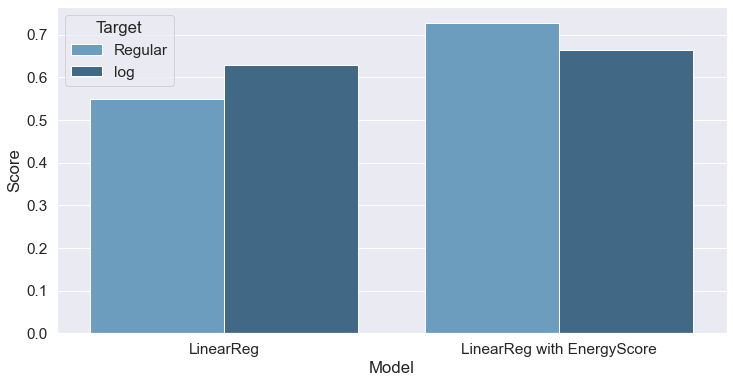

In [65]:
datlr = [{'Model' : 'LinearReg', 'Target' : 'Regular', 'Score' : one, 'EnergyScore': 'no'},
        {'Model' : 'LinearReg', 'Target' : 'log', 'Score' : two, 'EnergyScore': 'no'},
        {'Model' : 'LinearReg with EnergyScore', 'Target' : 'Regular', 'Score' : three, 'EnergyScore': 'yes'},
        {'Model' : 'LinearReg with EnergyScore', 'Target' : 'log', 'Score' : four, 'EnergyScore': 'yes'}
]

evalbase = pd.DataFrame(datlr)
         
sns.set(font_scale = 1.4)
f = plt.figure(figsize=(12, 6))

sns.axes_style("darkgrid")
ax = sns.barplot(x="Model", y="Score", hue='Target', data=evalbase, palette="Blues_d")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Linear Regr

In [67]:
start = time.time()

LR_model_1 = make_pipeline(prep, LinearRegression())
LR_model_1l = make_pipeline(prep, LinearRegression())
LR_model_1e = make_pipeline(prepe, LinearRegression())
LR_model_1el = make_pipeline(prepe, LinearRegression())

modellr = [LR_model_1, LR_model_1l, LR_model_1e, LR_model_1el]
modellrstr = ['LR_model_1', 'LR_model_1l', 'LR_model_1e', 'LR_model_1el']
X_trainloop = [X1_train, X1l_train, X1e_train, X1el_train]
y_trainloop = [y1_train, y1l_train, y1e_train, y1el_train]

params = {
    'linearregression__fit_intercept' : [True, False]
}

clf_lr = []
best_clf_lr = []

for i in range(4) :
    clf_lr.append(GridSearchCV(modellr[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_lr.append(clf_lr[i].fit(X_trainloop[i], y_trainloop[i]))
    
    print(clf_performance(best_clf_lr[i], modellrstr[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LR_model_1
Best Score: 0.5082832459775568
Best Parameters: {'linearregression__fit_intercept': False}
None
Fitting 5 folds for each of 2 candidates, totalling 10 fits
LR_model_1l
Best Score: 0.5226405936083494
Best Parameters: {'linearregression__fit_intercept': False}
None
Fitting 5 folds for each of 2 candidates, totalling 10 fits
LR_model_1e
Best Score: 0.4149370395442401
Best Parameters: {'linearregression__fit_intercept': False}
None
Fitting 5 folds for each of 2 candidates, totalling 10 fits
LR_model_1el
Best Score: 0.7039157814177944
Best Parameters: {'linearregression__fit_intercept': False}
None
total time:  2.1558406352996826 sec


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [68]:
LR_model_1b = make_pipeline(prep, LinearRegression())
LR_model_1lb = make_pipeline(prep, LinearRegression())

startm = time.time()

LR_model_1b.fit(X1_train, y1_train)
lr_score = LR_model_1b.score(X1_test, y1_test)

endm = time.time()
lr_time = endm - startm

print(lr_score)
print('--'*5)

startm = time.time()

LR_model_1lb.fit(X1l_train, y1l_train)
lrl_score = LR_model_1lb.score(X1l_test, y1l_test)

endm = time.time()
lrl_time = endm - startm

print(lrl_score)

0.5492647876977519
----------
0.6287027300414605


## Elastic Net

In [69]:
from sklearn.linear_model import ElasticNet

In [70]:
#model.get_params().keys()

In [71]:
start = time.time()

elas_model1 = make_pipeline(prep, ElasticNet())
elas_model1l = make_pipeline(prep, ElasticNet())
elas_model1e = make_pipeline(prepe, ElasticNet())
elas_model1el = make_pipeline(prepe, ElasticNet())

modelelas = [elas_model1, elas_model1l, elas_model1e, elas_model1el]
modelelasstr = ['elas_model1', 'elas_model1l', 'elas_model1e', 'elas_model1el']
X_trainloop = [X1_train, X1l_train, X1e_train, X1el_train]
y_trainloop = [y1_train, y1l_train, y1e_train, y1el_train]

params = {
    'elasticnet__random_state' : [0, 1],
    'elasticnet__l1_ratio' : [0, 0.5, 1],
    'elasticnet__selection' : ['cyclic', 'random'],
    'elasticnet__max_iter' : [1000, 10000]
}

clf_elas = []
best_clf_elas = []

for i in range(2) :
    clf_elas.append(GridSearchCV(modelelas[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_elas.append(clf_elas[i].fit(X_trainloop[i], y_trainloop[i]))
    
    print(clf_performance(best_clf_elas[i], modelelasstr[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.7s finished
L:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.978321594299909e+16, tolerance: 49464051829399.11
  model = cd_fast.sparse_enet_coordinate_descent(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


elas_model1
Best Score: 0.5082833224784024
Best Parameters: {'elasticnet__l1_ratio': 1, 'elasticnet__max_iter': 10000, 'elasticnet__random_state': 1, 'elasticnet__selection': 'random'}
None
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.5s finished


elas_model1l
Best Score: 0.37303836969858906
Best Parameters: {'elasticnet__l1_ratio': 0, 'elasticnet__max_iter': 10000, 'elasticnet__random_state': 1, 'elasticnet__selection': 'random'}
None
total time:  21.48818016052246 sec


L:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701.3752923895066, tolerance: 0.21500347935253744
  model = cd_fast.sparse_enet_coordinate_descent(


In [72]:
elas_model1b = make_pipeline(prep, ElasticNet(random_state = 1, l1_ratio = 1, selection = 'random', max_iter = 10000))
elas_model1lb = make_pipeline(prep, ElasticNet(random_state = 0, l1_ratio = 0, selection = 'cyclic'))


startm = time.time()

elas_model1b.fit(X1_train, y1_train)
elas_score = elas_model1b.score(X1_test, y1_test)

endm = time.time()
elas_time = endm - startm

print(elas_score)
print('--'*5)

startm = time.time()

elas_model1lb.fit(X1l_train, y1l_train)
elasl_score = elas_model1lb.score(X1l_test, y1l_test)

endm = time.time()
elasl_time = endm - startm

print(elasl_score)

0.5492650076047865
----------
0.4354599117970398


L:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.978321594299909e+16, tolerance: 49464051829399.11
  model = cd_fast.sparse_enet_coordinate_descent(
L:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701.3752923894995, tolerance: 0.21500347935253744
  model = cd_fast.sparse_enet_coordinate_descent(


## SVR

In [73]:
from sklearn.svm import LinearSVR

In [74]:
#SVRmodel1.get_params().keys()

In [75]:
start = time.time()

SVRmodel1 = make_pipeline(prep, LinearSVR())
SVRmodel1l = make_pipeline(prep, LinearSVR())
SVRmodel1e = make_pipeline(prepe, LinearSVR())
SVRmodel1el = make_pipeline(prepe, LinearSVR())

modelelsvr = [SVRmodel1, SVRmodel1l, SVRmodel1e, SVRmodel1el]
modelsvrstr = ['SVRmodel1', 'SVRmodel1l', 'SVRmodel1e', 'SVRmodel1el']
X_trainloop = [X1_train, X1l_train, X1e_train, X1el_train]
y_trainloop = [y1_train, y1l_train, y1e_train, y1el_train]

params = {
    'linearsvr__C' : [1.0, 2.0, 3],
    'linearsvr__loss' : ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'linearsvr__intercept_scaling' : [1,3,5],
    'linearsvr__epsilon' : [0.0, 0.5, 0.8],
    'linearsvr__max_iter' : [1000, 5000]
}

clf_svr = []
best_clf_svr = []

for i in range(2) :
    clf_svr.append(GridSearchCV(modelelsvr[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_svr.append(clf_svr[i].fit(X_trainloop[i], y_trainloop[i]))
    
    print(clf_performance(best_clf_svr[i], modelsvrstr[i]))

end = time.time()
print("total time: ",(end - start),"sec")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   12.0s finished
L:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


SVRmodel1
Best Score: 0.5510972186798619
Best Parameters: {'linearsvr__C': 3, 'linearsvr__epsilon': 0.0, 'linearsvr__intercept_scaling': 5, 'linearsvr__loss': 'squared_epsilon_insensitive', 'linearsvr__max_iter': 1000}
None
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 533 out of 540 | elapsed:   14.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.0s finished


SVRmodel1l
Best Score: 0.5264378263469478
Best Parameters: {'linearsvr__C': 2.0, 'linearsvr__epsilon': 0.5, 'linearsvr__intercept_scaling': 5, 'linearsvr__loss': 'epsilon_insensitive', 'linearsvr__max_iter': 1000}
None
total time:  27.30937886238098 sec


L:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [76]:
SVRmodel1 = make_pipeline(prep, LinearSVR(C = 3, intercept_scaling = 5, loss = 'squared_epsilon_insensitive'))
SVRmodel1l = make_pipeline(prep, LinearSVR(C = 1, intercept_scaling = 1, loss = 'squared_epsilon_insensitive'))

startm = time.time()
SVRmodel1.fit(X1_train, y1_train)
svr_score = SVRmodel1.score(X1_test, y1_test)
endm = time.time()
svr_time = endm - startm

print(svr_score)
print('--'*5)

startm = time.time()
SVRmodel1l.fit(X1l_train, y1l_train)
svrl_score = SVRmodel1l.score(X1l_test, y1l_test)
endm = time.time()
svrl_time = endm - startm

print(svrl_score)

L:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
L:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5818431483294215
----------
0.6145516802185269


## RandomForest

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [79]:
start = time.time()

RF_model_1 = make_pipeline(prep, RandomForestRegressor())
RF_model_1l = make_pipeline(prep, RandomForestRegressor())
RF_model_1e = make_pipeline(prepe, RandomForestRegressor())
RF_model_1el = make_pipeline(prepe, RandomForestRegressor())

modelrf = [RF_model_1, RF_model_1l, RF_model_1e, RF_model_1el]
modelrfstr = ['RF_model_1', 'RF_model_1l', 'RF_model_1e', 'RF_model_1el']
X_trainloop = [X1_train, X1l_train, X1e_train, X1el_train]
y_trainloop = [y1_train, y1l_train, y1e_train, y1el_train]

params = {
      'randomforestregressor__n_estimators' : [100, 200],
      "randomforestregressor__max_features": [1, 3, 5, 7, 8, 'auto', 'sqrt', 'log2'],
      "randomforestregressor__min_samples_split": [2, 4, 6],
      "randomforestregressor__criterion" : ['squared_error', 'mse', 'absolute_error', 'poisson'],
      "randomforestregressor__min_samples_leaf" : [1, 2, 3]
    
}

clf_ranf=[]
best_clf_ranf = []

for i in range(4) :
    clf_ranf.append(GridSearchCV(modelrf[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_ranf.append(clf_ranf[i].fit(X_trainloop[i], y_trainloop[i]))
    
    print(clf_performance(best_clf_ranf[i], modelrfstr[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2716 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.7min finished


RF_model_1
Best Score: 0.6208457437743886
Best Parameters: {'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}
None
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2796 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.7min finished


RF_model_1l
Best Score: 0.6935341263602556
Best Parameters: {'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_features': 5, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 6, 'randomforestregressor__n_estimators': 200}
None
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1884 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  2.4min finished


RF_model_1e
Best Score: 0.5343855303829634
Best Parameters: {'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 6, 'randomforestregressor__n_estimators': 200}
None
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 1312 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  2.6min finished


RF_model_1el
Best Score: 0.8476904993878275
Best Parameters: {'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_features': 8, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 200}
None
total time:  750.0663042068481 sec


In [80]:
RF_model1b = make_pipeline(prepe, RandomForestRegressor(max_depth = None, max_features = 9,
                                                                     min_samples_split = 2, n_estimators = 200))
RF_model1b.fit(X1el_train, y1el_train)
RF_model1b.score(X1el_test, y1el_test)

0.8762142077753464

In [81]:
RF_model1b = make_pipeline(prep, RandomForestRegressor(criterion = 'mse', max_depth = None, max_features = 8, 
                                                       min_samples_split = 4, min_samples_leaf = 2, n_estimators = 100))
RF_model1lb = make_pipeline(prep, RandomForestRegressor(criterion = 'mse', max_depth = None, max_features = 5, 
                                                        min_samples_leaf = 5, min_samples_split = 6, n_estimators = 200))

startm = time.time()
RF_model1b.fit(X1_train, y1_train)
rf_score = RF_model1b.score(X1_test, y1_test)
endm = time.time()
rf_time = endm - startm

print(rf_score)
print('--'*5)

startm = time.time()
RF_model1lb.fit(X1l_train, y1l_train)
rfl_score = RF_model1lb.score(X1l_test, y1l_test)
endm = time.time()
rfl_time = endm - startm

print(rfl_score)

0.6860815802114436
----------
0.6979697302301855


In [82]:
RF_model1b

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'Second_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Prop_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=8, min_samples_l

In [83]:
namesRF1 = RF_model1b['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names()

In [84]:
namesRF1.tolist()

['x0_Distribution Center',
 'x0_Hotel',
 'x0_K-12 School',
 'x0_Large Office',
 'x0_Medical Office',
 'x0_Mixed Use Property',
 'x0_Other',
 'x0_Retail Store',
 'x0_Self-Storage Facility',
 'x0_Small- and Mid-Sized Office',
 'x0_Supermarket / Grocery Store',
 'x0_University',
 'x0_Warehouse',
 'x0_Worship Facility']

In [99]:
namesRF0 = num_1 + namesRF1.tolist()

In [100]:
RF_model1b.named_steps['randomforestregressor'].n_features_in_

18

In [101]:
feature_importance = RF_model1b.named_steps['randomforestregressor'].feature_importances_
feature_importance

array([6.00579599e-02, 5.44327040e-01, 2.62534193e-01, 6.49241585e-03,
       2.06223817e-04, 1.22371498e-03, 2.53649522e-03, 3.19512813e-02,
       4.51352985e-02, 8.90590255e-03, 2.22935360e-02, 2.65851173e-04,
       2.26682774e-04, 9.85637193e-04, 3.54827715e-03, 5.90501890e-03,
       3.29481755e-03, 1.09654128e-04])

In [102]:
feature_names = [namesRF0] # attention, ça ne semble pas convenir à ce qu'on a en version main
#feature_names = [f'feature {i}' for i in range(X1elh_train.shape[0])]
forest = RF_model1b.named_steps['randomforestregressor']

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


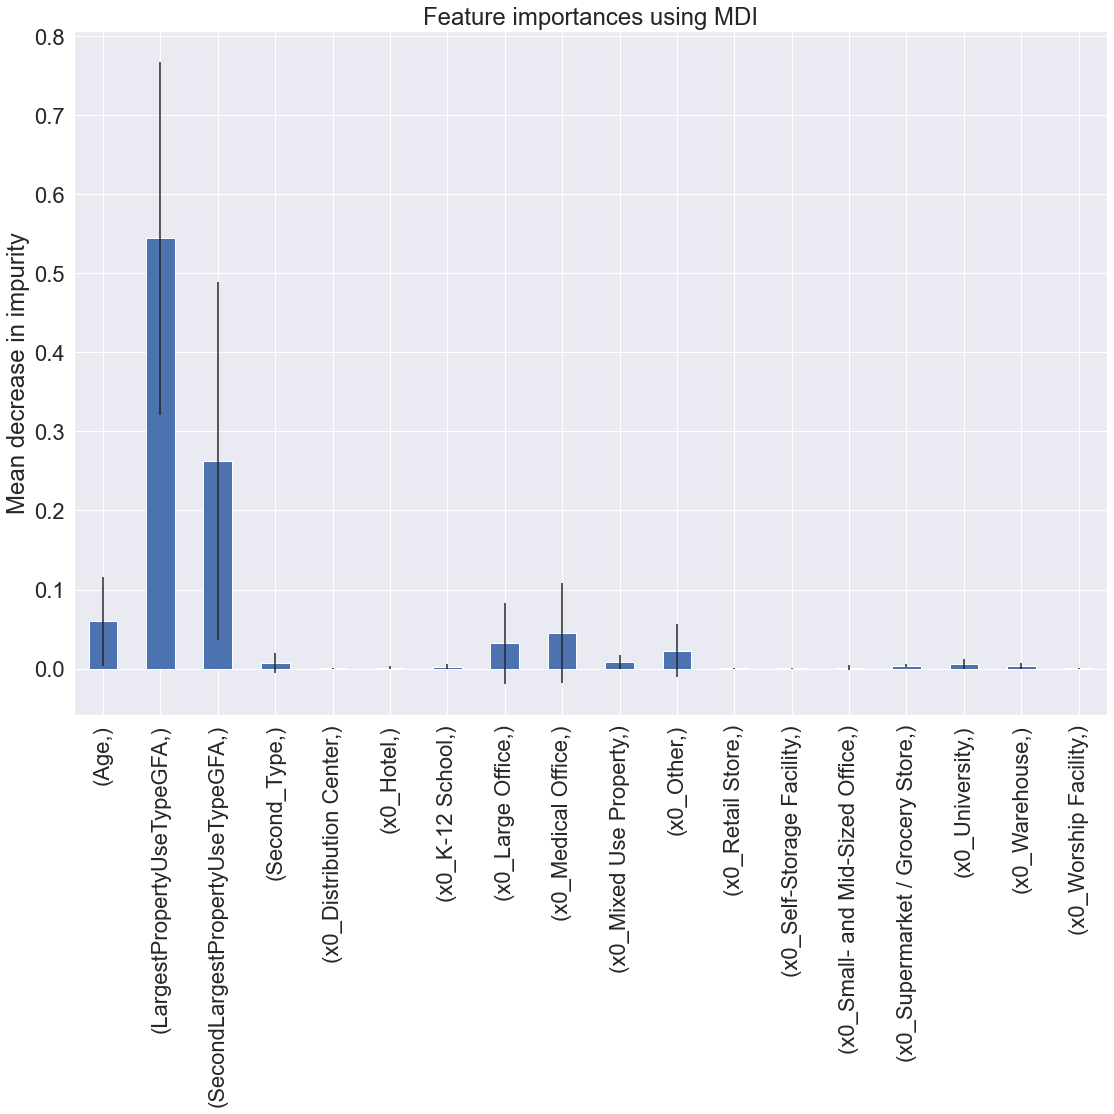

In [103]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(16,16))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### One hot à la main

In [104]:
machle['Prop_Type'].value_counts()

Small- and Mid-Sized Office    238
Large Office                   154
Warehouse                      148
K-12 School                    120
Retail Store                    80
Hotel                           69
Worship Facility                65
Medical Office                  65
Distribution Center             41
Supermarket / Grocery Store     38
Mixed Use Property              29
University                      15
Other                           13
Name: Prop_Type, dtype: int64

In [105]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
cath = enc.fit_transform(machle[['Prop_Type']])

In [106]:
cath

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
noms = enc.categories_
noms

[array(['Distribution Center', 'Hotel', 'K-12 School', 'Large Office',
        'Medical Office', 'Mixed Use Property', 'Other', 'Retail Store',
        'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
        'University', 'Warehouse', 'Worship Facility'], dtype=object)]

In [108]:
oneHcat = pd.DataFrame(cath, columns = ['Distribution Center', 'Hotel', 'K-12 School', 'Large Office',
        'Medical Office', 'Mixed Use Property', 'Other', 'Retail Store',
        'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
        'University', 'Warehouse', 'Worship Facility'])

In [109]:
oneHcat.head(1)

,Distribution Center,Hotel,K-12 School,Large Office,Medical Office,Mixed Use Property,Other,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
machle2 = machle.copy().reset_index(drop=True)
machle2[list(oneHcat)] = oneHcat[list(oneHcat)]

In [111]:
X1eh = machle2[['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'Second_Type', 'ENERGYSTARScore', 'Distribution Center', 'Hotel', 'K-12 School', 'Large Office',
                'Medical Office', 'Mixed Use Property', 'Other', 'Retail Store', 'Small- and Mid-Sized Office',
                'Supermarket / Grocery Store', 'University',  'Warehouse', 'Worship Facility']]
y1elh = machle2['logEner']

num_1h = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'Second_Type', 'ENERGYSTARScore', 'Distribution Center', 'Hotel', 'K-12 School', 'Large Office',
                'Medical Office', 'Mixed Use Property', 'Other', 'Retail Store', 'Small- and Mid-Sized Office',
                'Supermarket / Grocery Store', 'University',  'Warehouse', 'Worship Facility',  'Age']

X1elh_train, X1elh_test, y1elh_train, y1elh_test = \
    model_selection.train_test_split(X1eh, y1elh, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [112]:
X1elh_train.head(1)

,Age,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,Second_Type,ENERGYSTARScore,Distribution Center,Hotel,K-12 School,Large Office,Medical Office,Mixed Use Property,Other,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
652,57.0,38500.0,0.0,0,37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
start = time.time()

prepo = make_column_transformer((numerical_pipeline, num_1h))
RF_model_1elh = make_pipeline(prepo, RandomForestRegressor())

RF_model_1elh.fit(X1elh_train, y1elh_train)
print(RF_model_1elh.score(X1elh_test, y1elh_test))

params = {
      'randomforestregressor__n_estimators' : [100, 200],
      'randomforestregressor__max_depth': [3, None],
      "randomforestregressor__max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'auto', 'sqrt', 'log2'],
      "randomforestregressor__min_samples_split": [2, 4, 6],
}

clf_ranfh = GridSearchCV(RF_model_1elh, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_ranfh = clf_ranfh.fit(X1elh_train, y1elh_train)
    
print(clf_performance(best_clf_ranfh, 'RF_model_1elh'))

end = time.time()
print("total time: ",(end - start),"sec")

0.8776439943302754
Fitting 5 folds for each of 156 candidates, totalling 780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:  1.2min finished


RF_model_1elh
Best Score: 0.8499916243355503
Best Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 8, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}
None
total time:  74.3395631313324 sec


In [114]:
RF_model_1elh = make_pipeline(prepo, RandomForestRegressor(max_depth = None, max_features = 10,
                                                                     min_samples_split = 4, n_estimators = 100))
RF_model_1elh.fit(X1elh_train, y1elh_train)
RF_model_1elh.score(X1elh_test, y1elh_test)

0.8691564513689254

In [115]:
feature_importance = RF_model_1elh.named_steps['randomforestregressor'].feature_importances_
feature_importance

array([0.51799167, 0.1676129 , 0.01103471, 0.10801516, 0.0121984 ,
       0.00258128, 0.00317466, 0.02798706, 0.01021032, 0.00302202,
       0.00383448, 0.00298151, 0.0039733 , 0.03505446, 0.00142851,
       0.05410934, 0.00964543, 0.0251448 ])

In [116]:
list(X1elh_train)

['Age',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'Second_Type',
 'ENERGYSTARScore',
 'Distribution Center',
 'Hotel',
 'K-12 School',
 'Large Office',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Retail Store',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

In [117]:
feature_names2 = [list(X1elh_train)]
forest2 = RF_model_1elh.named_steps['randomforestregressor']

start_time = time.time()
importances2 = forest2.feature_importances_
std2 = np.std([
    tree.feature_importances_ for tree in forest2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


In [118]:
RF_model_1elh

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'Second_Type',
                                                   'ENERGYSTARScore',
                                                   'Distribution Center',
                                                   'Hotel', 'K-12 School',
                                                   'Large Office',
                                                   'Medical Office',
                                                   'Mixed Use Property',
                                                   'Other', 'Retail Sto

whatever the change in the colone affected by the pipeplines it seems that the order comes from the X_train

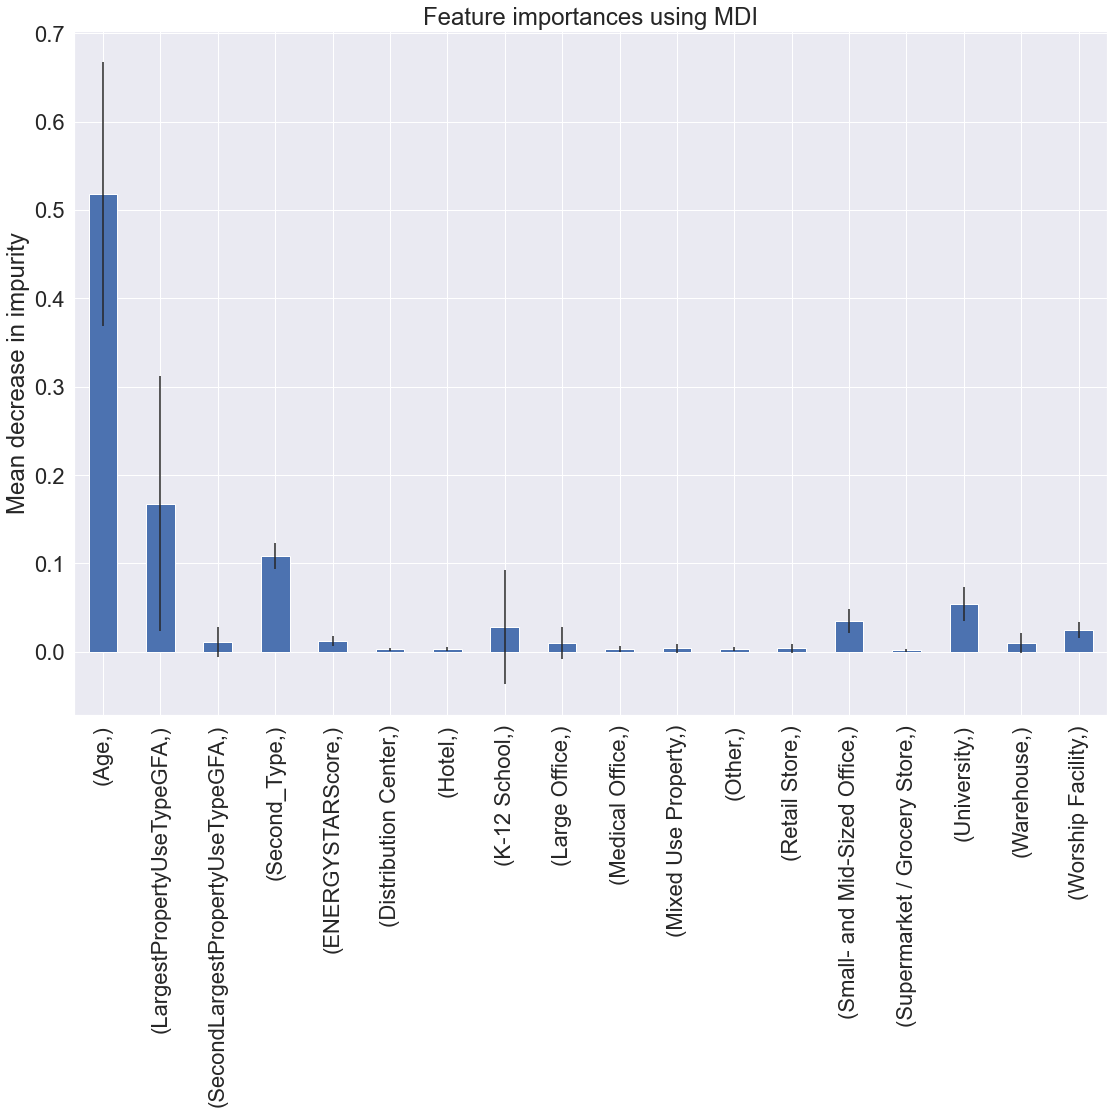

In [119]:
forest_importances2 = pd.Series(importances2, index=feature_names2)

fig, ax = plt.subplots(figsize=(16,16))
forest_importances2.plot.bar(yerr=std2, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [120]:
num_1h2 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'Second_Type', 'ENERGYSTARScore', 'Distribution Center', 'K-12 School', 'Large Office',
          'Mixed Use Property', 'Retail Store', 'Small- and Mid-Sized Office',
                'Supermarket / Grocery Store', 'University',  'Warehouse', 'Worship Facility']

In [121]:
start = time.time()

prepo2 = make_column_transformer((numerical_pipeline, num_1h2))
RF_model_1elh2 = make_pipeline(prepo2, RandomForestRegressor())

RF_model_1elh2.fit(X1elh_train, y1elh_train)
print(RF_model_1elh2.score(X1elh_test, y1elh_test))

params = {
      'randomforestregressor__n_estimators' : [100, 200],
      'randomforestregressor__max_depth': [3, None],
      "randomforestregressor__max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'auto', 'sqrt', 'log2'],
      "randomforestregressor__min_samples_split": [2, 4, 6],
}

clf_ranfh2 = GridSearchCV(RF_model_1elh2, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_ranfh2 = clf_ranfh2.fit(X1elh_train, y1elh_train)
    
print(clf_performance(best_clf_ranfh2, 'RF_model_1elh'))

end = time.time()
print("total time: ",(end - start),"sec")

0.8610912431876466
Fitting 5 folds for each of 156 candidates, totalling 780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 662 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:  1.2min finished


RF_model_1elh
Best Score: 0.8486971797088684
Best Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 8, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
None
total time:  71.91531920433044 sec


In [122]:
RF_model_1elh2 = make_pipeline(prepo2, RandomForestRegressor(max_depth = None, max_features = 7,
                                                                     min_samples_split = 4, n_estimators = 200))
RF_model_1elh2.fit(X1elh_train, y1elh_train)
RF_model_1elh2.score(X1elh_test, y1elh_test)

0.8618717306170104

In [123]:
feature_importance3 = RF_model_1elh2.named_steps['randomforestregressor'].feature_importances_
feature_importance3

array([0.0345785 , 0.52023375, 0.15119022, 0.01789008, 0.10972234,
       0.01415284, 0.00366702, 0.03699879, 0.00298573, 0.00349298,
       0.00418024, 0.03510893, 0.00123364, 0.05408895, 0.01047598])

In [124]:
RF_model_1elh2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'Second_Type',
                                                   'ENERGYSTARScore',
                                                   'Distribution Center',
                                                   'K-12 School',
                                                   'Large Office',
                                                   'Mixed Use Property',
                                                   'Retail Store',
                        

In [125]:
feature_names3 = [list(X1elh_train)]
forest3 = RF_model_1elh.named_steps['randomforestregressor']

start_time = time.time()
importances3 = forest3.feature_importances_
std3 = np.std([
    tree.feature_importances_ for tree in forest3.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


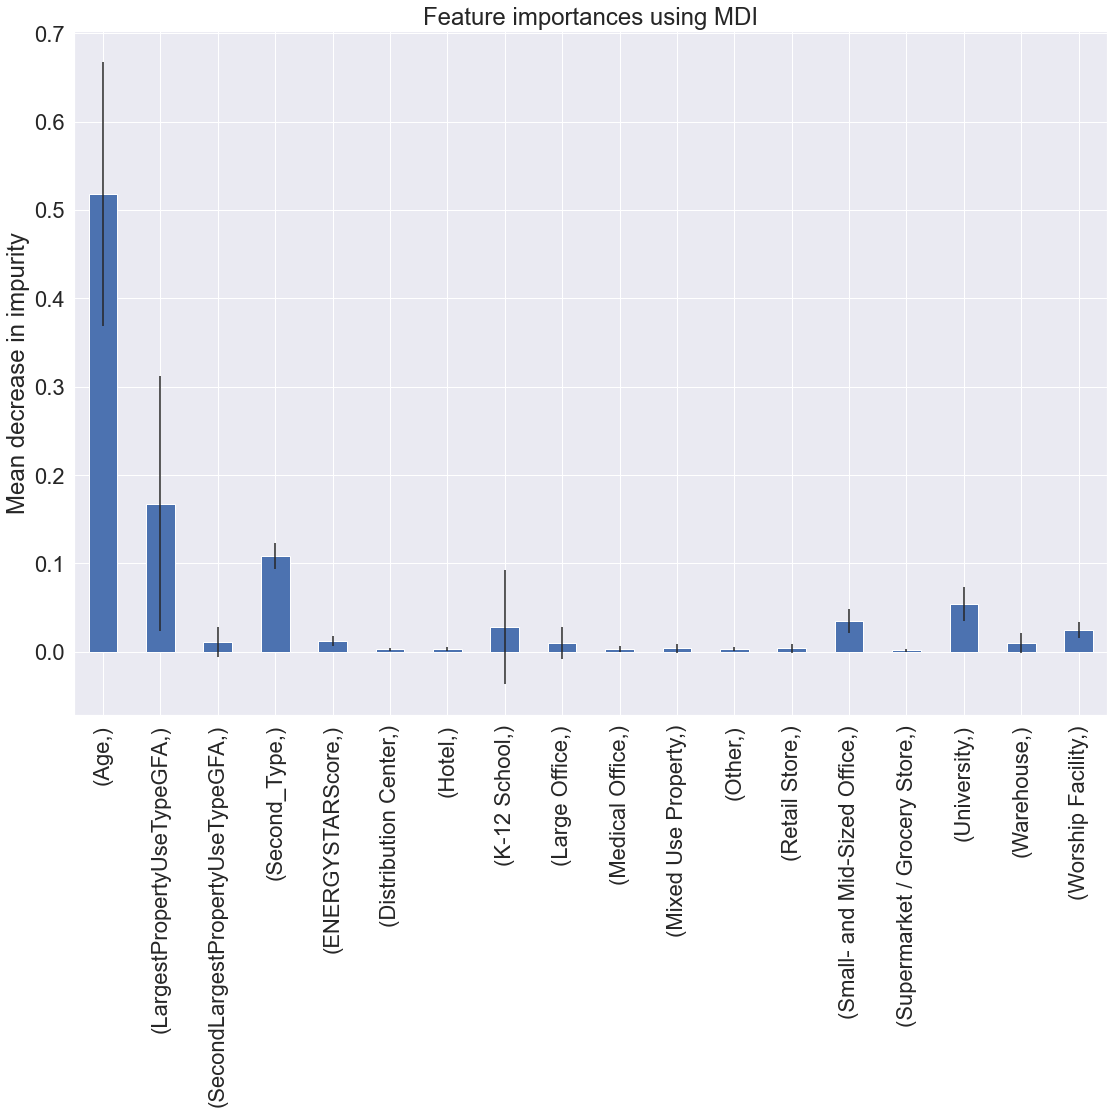

In [126]:
forest_importances3 = pd.Series(importances3, index=feature_names3)

fig, ax = plt.subplots(figsize=(16,16))
forest_importances3.plot.bar(yerr=std3, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Gradient boosting

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

In [128]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [129]:
start = time.time()

GB_model_1 = make_pipeline(prep, GradientBoostingRegressor())
GB_model_1l = make_pipeline(prep, GradientBoostingRegressor())
GB_model_1e = make_pipeline(prepe, GradientBoostingRegressor())
GB_model_1el = make_pipeline(prepe, GradientBoostingRegressor())

modelgb = [GB_model_1, GB_model_1l, GB_model_1e, GB_model_1el]
modelgbstr = ['GB_model_1', 'GB_model_1l', 'GB_model_1e', 'GB_model_1el']
X_trainloop = [X1_train, X1l_train, X1e_train, X1el_train]
y_trainloop = [y1_train, y1l_train, y1e_train, y1el_train]

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__min_samples_leaf' : [1,2,3],
    'gradientboostingregressor__min_samples_split' : [1,2,3]   
}

clf_gb=[]
best_clf_gb = []

for i in range(4) :
    clf_gb.append(GridSearchCV(modelgb[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_gb.append(clf_gb[i].fit(X_trainloop[i], y_trainloop[i]))
    
    print(clf_performance(best_clf_gb[i], modelgbstr[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GB_model_1
Best Score: 0.6292111032974681
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 100}
None
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GB_model_1l
Best Score: 0.702283106180832
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 3, 'gradientboostingregressor__min_samples_split': 3, 'gradientboostingregressor__n_estimators': 100}
None
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


GB_model_1e
Best Score: 0.49876875363259215
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 3, 'gradientboostingregressor__n_estimators': 200}
None
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


GB_model_1el
Best Score: 0.8668047727373469
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 3, 'gradientboostingregressor__n_estimators': 200}
None
total time:  486.4980547428131 sec


In [130]:
GB_model_1lb = make_pipeline(prep, GradientBoostingRegressor(criterion = 'mae', min_samples_leaf = 2,
                                                              min_samples_split = 3, n_estimators = 200))              

GB_model_1lb.fit(X1l_train, y1l_train)
print('score sur train :', GB_model_1lb.score(X1l_train, y1l_train))
print('score sur test :', GB_model_1lb.score(X1l_test, y1l_test))

score sur train : 0.7987281913710207
score sur test : 0.7156872280782163


In [131]:
GB_model_1b = make_pipeline(prep, GradientBoostingRegressor(criterion = 'mae', min_samples_leaf = 3,
                                                              min_samples_split = 2, n_estimators = 100))             

GB_model_1b.fit(X1_train, y1_train)
print('score sur train :', GB_model_1b.score(X1_train, y1_train))
print('score sur test :', GB_model_1b.score(X1_test, y1_test))

score sur train : 0.785348427427957
score sur test : 0.566124329945374


In [132]:
GB_model_1b = make_pipeline(prep, GradientBoostingRegressor(criterion = 'mae', min_samples_leaf = 3,
                                                              min_samples_split = 2, n_estimators = 100))   
GB_model_1lb = make_pipeline(prep, GradientBoostingRegressor(criterion = 'mae', min_samples_leaf = 2,
                                                              min_samples_split = 3, n_estimators = 200))   

startm = time.time()
GB_model_1b.fit(X1_train, y1_train)
gb_score = GB_model_1b.score(X1_test, y1_test)
endm = time.time()
gb_time = endm - startm

print(gb_score)
print('--'*5)

startm = time.time()
GB_model_1lb.fit(X1l_train, y1l_train)
gbl_score = GB_model_1lb.score(X1l_test, y1l_test)
endm = time.time()
gbl_time = endm - startm

print(gbl_score)

0.5804264205026037
----------
0.7122781213945776


#### features

In [133]:
GB_model_1lb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'Second_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Prop_Type'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mae', min_

In [134]:
feature_importance_gb = GB_model_1lb.named_steps['gradientboostingregressor'].feature_importances_
feature_importance_gb

array([0.04471027, 0.63939449, 0.08682207, 0.01169173, 0.01098834,
       0.00698147, 0.02181511, 0.00301015, 0.01387663, 0.00407767,
       0.01604237, 0.0010034 , 0.0263534 , 0.00128159, 0.04710107,
       0.0047227 , 0.04341554, 0.016712  ])

In [135]:
from sklearn.inspection import permutation_importance

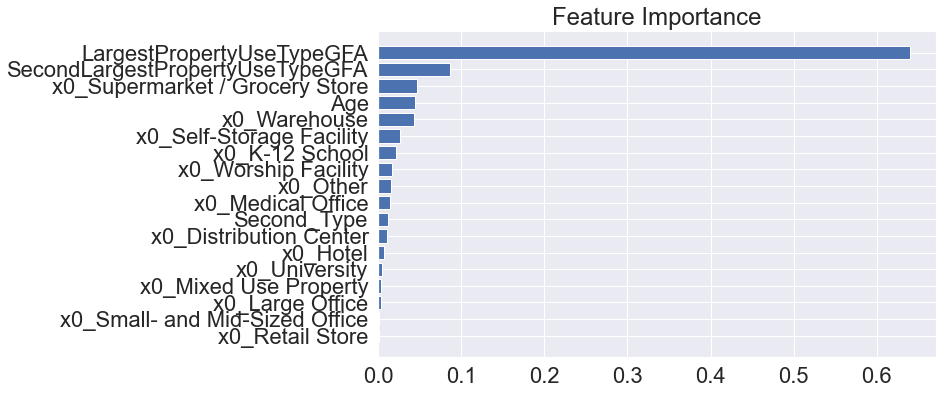

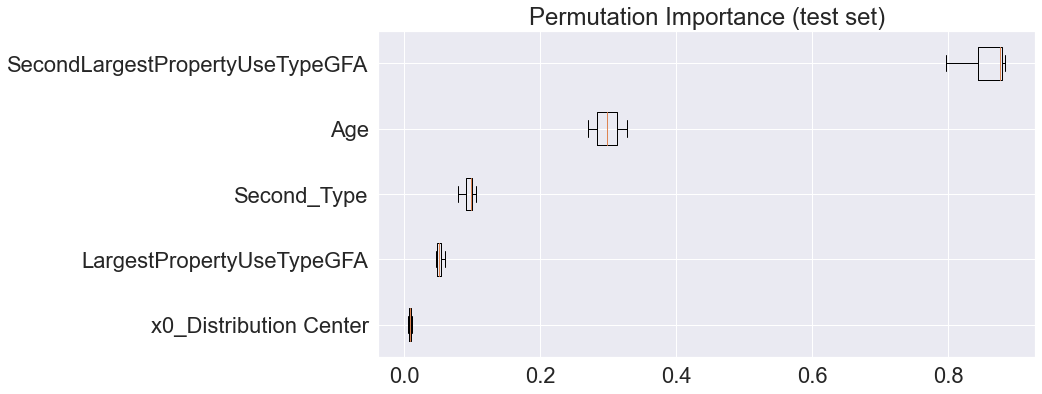

In [136]:
namesRF1_gb = GB_model_1lb['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names()
namesRF0_gb = num_1 + namesRF1_gb.tolist()
feature_names_gb = namesRF0_gb

modgb = GB_model_1lb.named_steps['gradientboostingregressor']

feature_importances_gb = modgb.feature_importances_
sorted_idx = np.argsort(feature_importance_gb)

pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importances_gb[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names_gb)[sorted_idx])
plt.title('Feature Importance')

result = permutation_importance(GB_model_1lb, X1l_train, y1l_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig = plt.figure(figsize=(15, 6))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names_gb)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

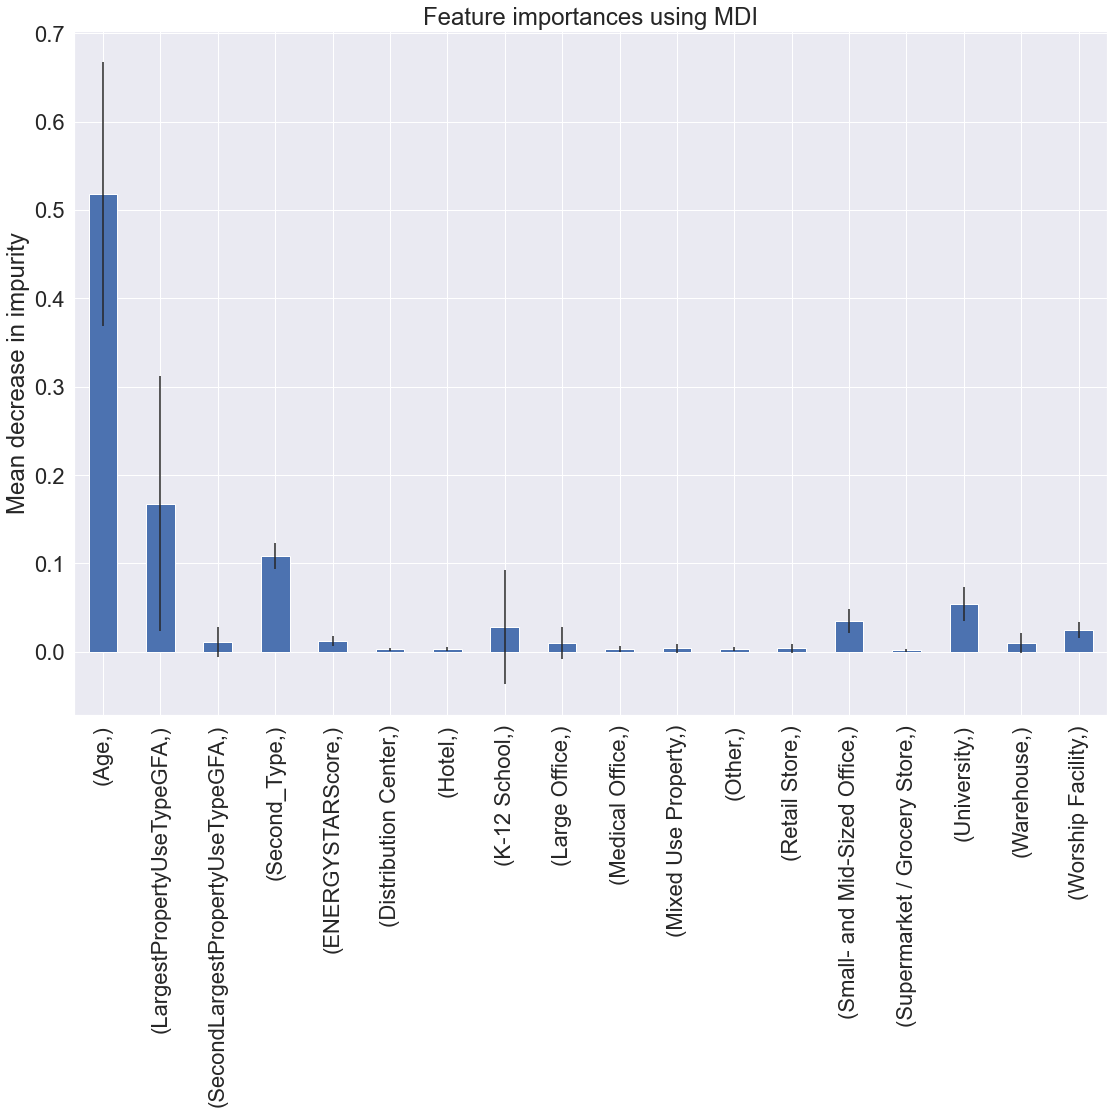

In [137]:
forest_importances3 = pd.Series(importances3, index=feature_names3)

fig, ax = plt.subplots(figsize=(16,16))
forest_importances3.plot.bar(yerr=std3, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### printing the model scores

In [138]:
datm = [{'Model' : 'LinearReg', 'Target' : 'Regular', 'Score' : lr_score, 'Time' : lr_time},
        {'Model' : 'LinearReg', 'Target' : 'log', 'Score' : lrl_score, 'Time' : lrl_time},
        {'Model' : 'SVR', 'Target' : 'Regular', 'Score' : svr_score, 'Time' : svr_time},
        {'Model' : 'SVR', 'Target' : 'log', 'Score' : svrl_score, 'Time' : svrl_time},
        {'Model' : 'Elastic', 'Target' : 'Regular', 'Score' : elas_score, 'Time' : elas_time},
        {'Model' : 'Elastic', 'Target' : 'log', 'Score' : elasl_score, 'Time' : elasl_time},
        {'Model' : 'RandomF', 'Target' : 'Regular', 'Score' : rf_score, 'Time' : rf_time},
        {'Model' : 'RandomF', 'Target' : 'log', 'Score' : rfl_score, 'Time' : rfl_time},
        {'Model' : 'GrandientB', 'Target' : 'Regular', 'Score' : gb_score, 'Time' : gb_time},
        {'Model' : 'GrandientB', 'Target' : 'log', 'Score' : gbl_score, 'Time' : gbl_time}
            ]

evalmodel = pd.DataFrame(datm)
evalmodel

,Model,Target,Score,Time
0,LinearReg,Regular,0.549265,0.022985
1,LinearReg,log,0.628703,0.020987
2,SVR,Regular,0.581843,0.105936
3,SVR,log,0.614552,0.072956
4,Elastic,Regular,0.549265,0.968410
5,Elastic,log,0.435460,0.113931
6,RandomF,Regular,0.686082,0.954081
7,RandomF,log,0.697970,1.103344
8,GrandientB,Regular,0.580426,8.052061
9,GrandientB,log,0.712278,15.589424


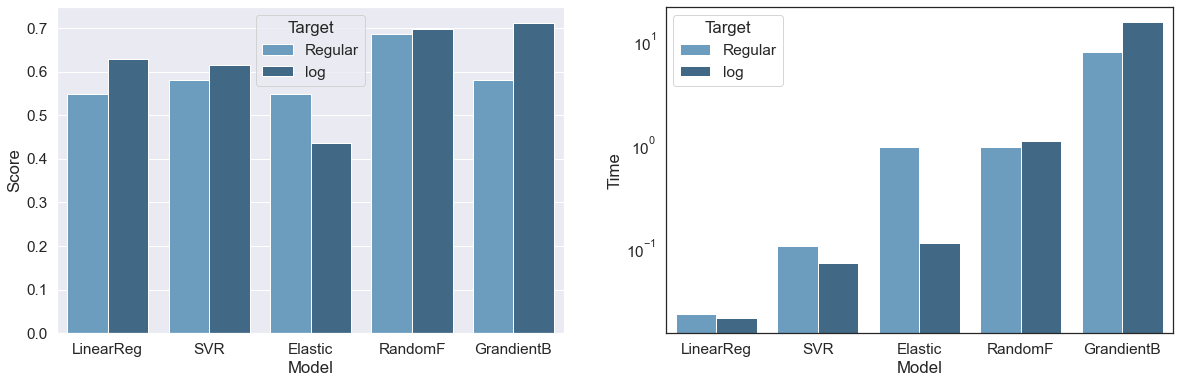

In [139]:
sns.set(font_scale = 1.4)
f = plt.figure(figsize=(20, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    ax = sns.barplot(x="Model", y="Score", hue='Target', data=evalmodel, palette="Blues_d")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    ax = sns.barplot(x="Model", y="Time", hue='Target', data=evalmodel, palette="Blues_d")
    ax.set_yscale("log")

In [140]:
# models = ['LinearReg', 'SVR', 'Elastic', 'RandomF', 'GrandientB']
# Targets = ['Regular', 'log']
# Measures = ['Score', 'Time']

# Values = [[lr_score, lr_time], [lrl_score, lrl_time], [svr_score, svr_time], [svrl_score, svrl_time],
#           [elas_score, elas_time], [elasl_score, elasl_time], [rf_score, rf_time], [rfl_score, rfl_time],
#          [gb_score, gb_time], [gbl_score, gbl_time]]

# numval = 0

# for i in range(len(models)) :
#     for y in range(len(Targets)) :
#         for r in range(2) :
#             datm2.append({'Model' : models[i], 'Target' : Targets[y], 'Measure' : Measures[r], 'Value' : Values[2*i+y][r]})

# evalmodel2 = pd.DataFrame(datm)

In [141]:
# sns.set_style("dark")
# sns.set(font_scale = 2)
# g = sns.catplot(x="Model", y='Value',
#                 hue='Target', col='Measure',
#                 data=evalmodel2, kind="bar",
#                 height=6, aspect=2);

### Test sur le modèle sélectionné : Gradiant Boosting

#### Etude des paramètres

total time:  16.887601613998413 sec


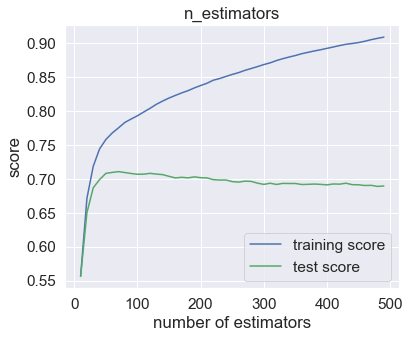

In [142]:
start = time.time()

train_n = []
test_n = []
x_n = []

for i in range(10, 500, 10) :
    
    GB_model_1lt = make_pipeline(prep, GradientBoostingRegressor(n_estimators = i))
    
    GB_model_1lt.fit(X1l_train, y1l_train)
    train_n.append(GB_model_1lt.score(X1l_train, y1l_train))
    test_n.append(GB_model_1lt.score(X1l_test, y1l_test))
    x_n.append(i)
    
fig, ax = plt.subplots(figsize=(6,5))   
plt.plot(x_n, train_n, label = "training score", color = 'b')
plt.plot(x_n, test_n, label = "test score", color = 'g')

plt.title("n_estimators")
plt.xlabel("number of estimators")
plt.ylabel("score")
plt.tight_layout()
plt.legend(loc = 'best')

end = time.time()
print("total time: ",(end - start),"sec")

In [143]:
from sklearn.model_selection import validation_curve

total time:  83.61735725402832 sec


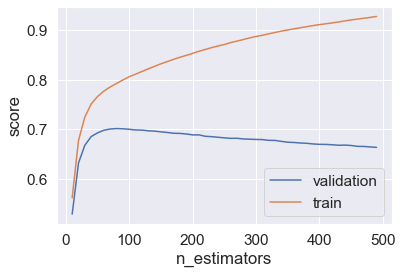

In [146]:
start = time.time()

k = np.arange(10, 500, 10)

GB_model_1ltv = make_pipeline(prep, GradientBoostingRegressor())

#train_score_n, val_score_n = validation_curve(GB_model_1ltv, X1l_train, y1l_train, param_grid = params, cv=5)
train_score_n, val_score_n = validation_curve(GB_model_1ltv, X1l_train, y1l_train,
                                              param_name='gradientboostingregressor__n_estimators',
                                              param_range=k, cv=5)

plt.plot(k, val_score_n.mean(axis = 1), label ="validation")
plt.plot(k, train_score_n.mean(axis = 1), label ="train")
         
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()
         
end = time.time()
print("total time: ",(end - start),"sec")

In [147]:
start = time.time()

train_md = []
test_md = []
x_md = []

for i in range(1, 15, 1) :
    
    GB_model_1lt = make_pipeline(prep, GradientBoostingRegressor(max_depth = i))
    
    GB_model_1lt.fit(X1l_train, y1l_train)
    train_md.append(GB_model_1lt.score(X1l_train, y1l_train))
    test_md.append(GB_model_1lt.score(X1l_test, y1l_test))
    x_md.append(i)
    
# fig, ax = plt.subplots(figsize=(6,6))   
# plt.plot(x_n, train_n, label = "training score", color = 'b')
# plt.plot(x_n, test_n, label = "test score", color = 'g')

# plt.title("max_depth")
# plt.xlabel("max_depth")
# plt.ylabel("score")
# plt.tight_layout()
# plt.legend(loc = 'best')

end = time.time()
print("total time: ",(end - start),"sec")

total time:  6.48911452293396 sec


In [148]:
start = time.time()

train_mss = []
test_mss = []
x_mss = []

for i in range(2, 10, 1) :
    
    GB_model_1lt = make_pipeline(prep, GradientBoostingRegressor(min_samples_split = i))
    
    GB_model_1lt.fit(X1l_train, y1l_train)
    train_mss.append(GB_model_1lt.score(X1l_train, y1l_train))
    test_mss.append(GB_model_1lt.score(X1l_test, y1l_test))
    x_mss.append(i)
    
# fig, ax = plt.subplots(figsize=(6,6))   
# plt.plot(x_n, train_n, label = "training score", color = 'b')
# plt.plot(x_n, test_n, label = "test score", color = 'g')

# plt.title("min_samples_split")
# plt.xlabel("number of min spl")
# plt.ylabel("score")
# plt.tight_layout()
# plt.legend(loc = 'best')

end = time.time()
print("total time: ",(end - start),"sec")

total time:  1.4011452198028564 sec


In [149]:
start = time.time()

train_msl = []
test_msl = []
x_msl = []

for i in range(1, 20, 1) :
    
    GB_model_1lt = make_pipeline(prep, GradientBoostingRegressor(min_samples_leaf = i))
    
    GB_model_1lt.fit(X1l_train, y1l_train)
    train_msl.append(GB_model_1lt.score(X1l_train, y1l_train))
    test_msl.append(GB_model_1lt.score(X1l_test, y1l_test))
    x_msl.append(i)
    
# fig, ax = plt.subplots(figsize=(6,6))   
# plt.plot(x_n, train_n, label = "training score", color = 'b')
# plt.plot(x_n, test_n, label = "test score", color = 'g')

# plt.title("min_samples_leaf")
# plt.xlabel("number of min slf")
# plt.ylabel("score")
# plt.tight_layout()
# plt.legend(loc = 'best')

end = time.time()
print("total time: ",(end - start),"sec")

total time:  2.8842339515686035 sec


In [150]:
start = time.time()

train_c = []
test_c = []
x_c = []
crit = ['friedman_mse', 'mae', 'mse']

for i in range(len(crit)) :
    
    GB_model_1lt = make_pipeline(prep, GradientBoostingRegressor(criterion = crit[i]))
    
    GB_model_1lt.fit(X1l_train, y1l_train)
    train_c.append(GB_model_1lt.score(X1l_train, y1l_train))
    test_c.append(GB_model_1lt.score(X1l_test, y1l_test))
    x_c.append(i)
    
# fig, ax = plt.subplots(figsize=(6,6))   
# plt.plot(x_n, train_n, label = "training score", color = 'b')
# plt.plot(x_n, test_n, label = "test score", color = 'g')

# plt.title("criterion")
# plt.xlabel('0 = friedman, 1 = mae, 2 = mse')
# plt.ylabel("score")
# plt.tight_layout()
# plt.legend(loc = 'best')

end = time.time()
print("total time: ",(end - start),"sec")

total time:  8.057077646255493 sec


In [151]:
start = time.time()

train_l = []
test_l = []
x_l = []
loss = ['ls','huber', 'quantile']

for i in range(len(loss)) :
    
    GB_model_1lt = make_pipeline(prep, GradientBoostingRegressor(loss = loss[i]))
    
    GB_model_1lt.fit(X1l_train, y1l_train)
    train_l.append(GB_model_1lt.score(X1l_train, y1l_train))
    test_l.append(GB_model_1lt.score(X1l_test, y1l_test))
    x_l.append(i)
    
# fig, ax = plt.subplots(figsize=(6,6))   
# plt.plot(x_n, train_n, label = "training score", color = 'b')
# plt.plot(x_n, test_n, label = "test score", color = 'g')

# plt.title("loss")
# plt.xlabel('0 = sq, 1 = abs, 2 = huber, 4=quant')
# plt.ylabel("score")
# plt.tight_layout()
# plt.legend(loc = 'best')

end = time.time()
print("total time: ",(end - start),"sec")

total time:  0.8774640560150146 sec


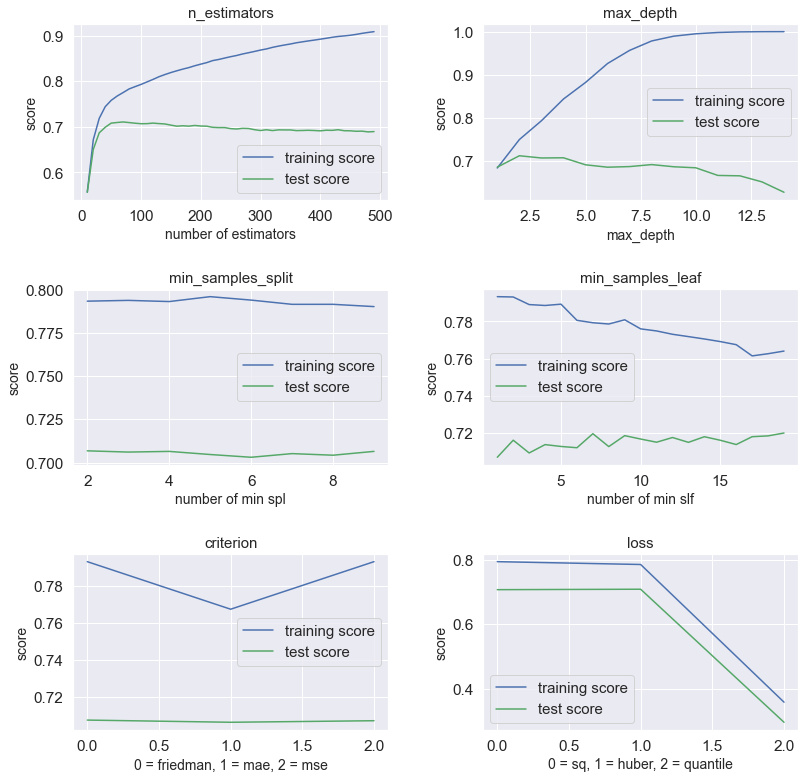

In [152]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(13, 13))
fig.subplots_adjust(wspace=0.3, hspace=0.5)


axss = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1], axs[2, 0], axs[2, 1]]
xs = [x_n, x_md, x_mss, x_msl, x_c, x_l]
trains = [train_n, train_md, train_mss, train_msl, train_c, train_l]
tests = [test_n, test_md, test_mss, test_msl, test_c, test_l]
lab = ['training score', 'test score']

titles = ["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf", "criterion", "loss"]
xlabels = ['number of estimators', 'max_depth', "number of min spl", 'number of min slf',
           '0 = friedman, 1 = mae, 2 = mse',  '0 = sq, 1 = huber, 2 = quantile']

       
for i in range(len(axss)) :

    axss[i].plot(xs[i], trains[i], label = lab[0], color = 'b')
    axss[i].plot(xs[i], tests[i], label = lab[1], color = 'g')

    axss[i].set_title(titles[i], fontsize=15)
    axss[i].set_xlabel(xlabels[i], fontsize=14)
    axss[i].set_ylabel("score", fontsize=14)
    axss[i].legend(loc = 'best', fontsize=15)


In [153]:
start = time.time()

GB_model_1l = make_pipeline(prep, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}


clf_gb = GridSearchCV(GB_model_1l, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb = clf_gb.fit(X1l_train, y1l_train)
    
print(clf_performance(best_clf_gb, "GB"))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.2s


GB
Best Score: 0.7028879937522052
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 5, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 100}
None
total time:  15.375603914260864 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.1s finished


#### learning curve

In [154]:
from sklearn.model_selection import learning_curve

[ 201  402  603  804 1006]


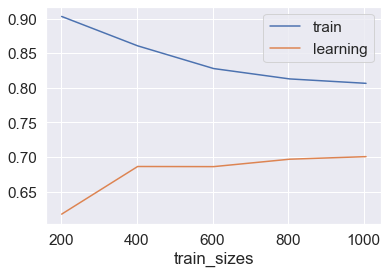

In [155]:
GB_model_1llearn = make_pipeline(prep, GradientBoostingRegressor(criterion = 'friedman_mse', min_samples_leaf = 1))

N, train_score, val_score = learning_curve(GB_model_1llearn, X1l_train, y1l_train, train_sizes = np.linspace(0.2, 1, 5), cv = 5)

print(N)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'learning')
plt.xlabel('train_sizes')
plt.legend()

## Emission CO2

### modèle 1, même modèle qu'avec 'SiteEnergyUse(kBtu)'

In [156]:
Xg1 = machl[['Prop_Type', 'Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Second_Type']]
yg1l = machl['logGHG']
yg1 = machl['GHGEmissions(MetricTonsCO2e)']

X1g_train, X1g_test, y1g_train, y1g_test = \
    model_selection.train_test_split(Xg1, yg1, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

X1gl_train, X1gl_test, y1gl_train, y1gl_test = \
    model_selection.train_test_split(Xg1, yg1l, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [157]:
start = time.time()

GB_model_g1 = make_pipeline(prep, GradientBoostingRegressor())
GB_model_g1l = make_pipeline(prep, GradientBoostingRegressor())

modelgb_g1 = [GB_model_g1, GB_model_g1l]
modelgbstr_g1 = ['GB_model_g1', 'GB_model_g1l']
X_trainloop_g1 = [X1g_train, X1gl_train]
y_trainloop_g1 = [y1g_train, y1gl_train]

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_g1 = []
best_clf_gb_g1 = []

for i in range(len(modelgb_g1)) :
    clf_gb_g1.append(GridSearchCV(modelgb_g1[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_gb_g1.append(clf_gb_g1[i].fit(X_trainloop_g1[i], y_trainloop_g1[i]))
    
    print(clf_performance(best_clf_gb_g1[i], modelgbstr_g1[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GB_model_g1
Best Score: 0.696174868793945
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 70}
None
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s


GB_model_g1l
Best Score: 0.5378370909367314
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 8, 'gradientboostingregressor__n_estimators': 100}
None
total time:  30.126587390899658 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   14.6s finished


In [158]:
GB_model_g1lb = make_pipeline(prep, GradientBoostingRegressor(criterion = 'mse', min_samples_leaf = 2,
                                                              min_samples_split = 8, n_estimators = 130))               

GB_model_g1lb.fit(X1gl_train, y1gl_train)
ghgtrain = GB_model_g1lb.score(X1gl_train, y1gl_train)
ghgtest = GB_model_g1lb.score(X1gl_test, y1gl_test)
print('score sur train :', ghgtrain)
print('--'*5)
print('score sur test :', ghgtest)

score sur train : 0.6829033097641963
----------
score sur test : 0.506010174006845


### modèle 2, uniquement avec la prediction sur 'SiteEnergyUse(kBtu)'

#### création de la variable "prédict" qui est la prédiction que l'on fait pour 'SiteEnergyUse(kBtu)'

In [159]:
machl['Epred'] = GB_model_g1lb.predict(X1)

In [160]:
Xg2 = machl[['Epred']]
yg2l = machl['logGHG']

prepg2 = make_column_transformer((numerical_pipeline, list(Xg2)))

X2gl_train, X2gl_test, y2gl_train, y2gl_test = \
    model_selection.train_test_split(Xg2, yg2l, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [161]:
start = time.time()

GB_model_g2l = make_pipeline(prepg2, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}


clf_gb_g2 = GridSearchCV(GB_model_g2l, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_g2 = clf_gb_g2.fit(X2gl_train, y2gl_train)
    
print(clf_performance(best_clf_gb_g2, 'GB_model_g2l'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.5s


GB_model_g2l
Best Score: 0.6371691007236556
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 5, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 70}
None
total time:  8.859586477279663 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    8.7s finished


In [162]:
GB_model_g2lb = make_pipeline(prepg2, GradientBoostingRegressor(criterion = 'friedman_mse', min_samples_leaf = 6,
                                                              min_samples_split = 2, n_estimators = 70))               

GB_model_g2lb.fit(X2gl_train, y2gl_train)


ghg2train = GB_model_g2lb.score(X2gl_train, y2gl_train)
ghg2test = GB_model_g2lb.score(X2gl_test, y2gl_test)
print('score sur train :', ghg2train)
print('--'*5)
print('score sur test :', ghg2test)

score sur train : 0.6974989280278224
----------
score sur test : 0.6339457344321102


### modèle 3, prediction + % des types d'énergies

In [163]:
Xg3 = machl[['Epred', 'Steam(%)', 'Elec(%)', 'Gas(%)', 'Other(%)']]
yg3l = machl['logGHG']

prepg3 = make_column_transformer((numerical_pipeline, list(Xg3)))

X3gl_train, X3gl_test, y3gl_train, y3gl_test = \
    model_selection.train_test_split(Xg3, yg3l, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [164]:
start = time.time()

GB_model_g3l = make_pipeline(prepg3, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_g3 = GridSearchCV(GB_model_g3l, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_g3 = clf_gb_g3.fit(X3gl_train, y3gl_train)
    
print(clf_performance(best_clf_gb_g3, 'GB_model_g3l'))

end = time.time()
print("total time: ",(end - start),"sec")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s


GB_model_g3l
Best Score: 0.7993288198097935
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 4, 'gradientboostingregressor__n_estimators': 70}
None
total time:  11.259116888046265 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   11.1s finished


In [165]:
GB_model_g3lb = make_pipeline(prepg3, GradientBoostingRegressor(criterion = 'friedman_mse', min_samples_leaf = 8,
                                                              min_samples_split = 8, n_estimators = 70))               

GB_model_g3lb.fit(X3gl_train, y3gl_train)

ghg3train = GB_model_g3lb.score(X3gl_train, y3gl_train)
ghg3test = GB_model_g3lb.score(X3gl_test, y3gl_test)
print('score sur train :', ghg3train)
print('--'*5)
print('score sur test :', ghg3test)

score sur train : 0.8410556304578297
----------
score sur test : 0.8001937322543369


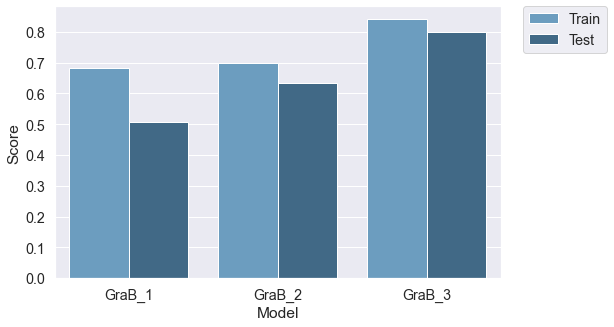

In [166]:
datghg = [{'Model' : 'GraB_1', 'Set' : 'Train', 'Score' : ghgtrain},
        {'Model' : 'GraB_1', 'Set' : 'Test', 'Score' : ghgtest},
        {'Model' : 'GraB_2', 'Set' : 'Train', 'Score' : ghg2train},
        {'Model' : 'GraB_2', 'Set' : 'Test', 'Score' : ghg2test},
        {'Model' : 'GraB_3', 'Set' : 'Train', 'Score' : ghg3train},
        {'Model' : 'GraB_3', 'Set' : 'Test', 'Score' : ghg3test},
]

evalghg = pd.DataFrame(datghg)

sns.set(font_scale = 1.3)
f = plt.figure(figsize=(8, 5))

ax = sns.barplot(x='Model', y="Score", hue='Set', data=evalghg, palette="Blues_d")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Jouons avec l'input du modèle

## test 1

In [168]:
# Je remplace PropType par Building Type

machlj = d16.copy().dropna(subset = ['Steam(%)'], axis = 0)

Xj1 = machlj.drop(['logEner'], axis = 1)
yj1 = machlj['logEner']

Xj1_train, Xj1_test, yj1_train, yj1_test = \
    model_selection.train_test_split(Xj1, yj1, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

## test0

In [169]:
start = time.time()

cat_j0 = ['Prop_Type']
num_j0 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Second_Type']
prept0 = make_column_transformer((numerical_pipeline, num_j0), (categorical_pipeline, cat_j0))
GB_model_j0 = make_pipeline(prept0, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j0 = GridSearchCV(GB_model_j0, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j0 = clf_gb_j0.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j0, 'GB_model_gj0'))

end = time.time()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s


GB_model_gj0
Best Score: 0.7128791845917583
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.7s finished


In [170]:
GB_model_j0 = clf_gb_j0.best_estimator_

GB_model_j0.fit(Xj1_train, yj1_train)
print(GB_model_j0.score(Xj1_train, yj1_train))
print(GB_model_j0.score(Xj1_test, yj1_test))

0.8021724716406786
0.7074731085860453


In [171]:
cat_j1 = ['BuildingType']
num_j1 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Second_Type']

prep1 = make_column_transformer((numerical_pipeline, num_j1), (categorical_pipeline, cat_j1))

start = time.time()

GB_model_j1 = make_pipeline(prep1, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j1 = GridSearchCV(GB_model_j1, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j1 = clf_gb_j1.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j1, 'GB_model_gj1'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s


GB_model_gj1
Best Score: 0.591713773539883
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 8, 'gradientboostingregressor__n_estimators': 70}
None
total time:  14.187108039855957 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   14.0s finished


In [172]:
GB_model_j1 = clf_gb_j1.best_estimator_

GB_model_j1.fit(Xj1_train, yj1_train)
print(GB_model_j1.score(Xj1_train, yj1_train))
print(GB_model_j1.score(Xj1_test, yj1_test))

0.670386587125643
0.6137930167894539


## test 2

In [173]:
#Juste largest property

start = time.time()

num_j2 = ['LargestPropertyUseTypeGFA']
prept = make_column_transformer((numerical_pipeline, num_j2), (categorical_pipeline, cat_j1))
GB_model_j2 = make_pipeline(prept, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j2 = GridSearchCV(GB_model_j2, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j2 = clf_gb_j2.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j2, 'GB_model_gj2'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s


GB_model_gj2
Best Score: 0.5559711211378899
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 70}
None
total time:  9.450129985809326 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    9.3s finished


In [174]:
GB_model_j2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['LargestPropertyUseTypeGFA']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [175]:
GB_model_j2.fit(Xj1_train, yj1_train)

feature_importance_gb_j2 = GB_model_j2.named_steps['gradientboostingregressor'].feature_importances_
feature_importance_gb_j2

array([0.97338861, 0.0039813 , 0.0088079 , 0.00327298, 0.0105492 ])

In [176]:
machlj['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus'], dtype=object)

In [177]:
GB_model_j2 = clf_gb_j2.best_estimator_

GB_model_j2.fit(Xj1_train, yj1_train)
print('train :', GB_model_j2.score(Xj1_train, yj1_train))
print('test :', GB_model_j2.score(Xj1_test, yj1_test))

train : 0.6126714455549034
test : 0.568500827687365


## test 3

In [178]:
# PropertyGFABuilding(s) instead of  LargestPropertyUseTypeGFA and SecondLargestPropertyUseTypeGFA

start = time.time()

cat_j3 = ['Prop_Type']
num_j3 = ['Age', 'PropertyGFABuilding(s)', 'Second_Type']
prept3 = make_column_transformer((numerical_pipeline, num_j3), (categorical_pipeline, cat_j3))
GB_model_j3 = make_pipeline(prept3, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j3 = GridSearchCV(GB_model_j3, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j3 = clf_gb_j3.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j3, 'GB_model_gj3'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   13.2s finished


GB_model_gj3
Best Score: 0.7049975274169367
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None
total time:  13.524904012680054 sec


In [179]:
GB_model_j3 = clf_gb_j3.best_estimator_

GB_model_j3.fit(Xj1_train, yj1_train)
print('train :', GB_model_j3.score(Xj1_train, yj1_train))
print('test :', GB_model_j3.score(Xj1_test, yj1_test))

train : 0.7877661288624491
test : 0.6990010084521765


## test 4

In [180]:
# + Th# ThirdLargest en +

start = time.time()

cat_j4 = ['Prop_Type']
num_j4 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Second_Type']
prept4 = make_column_transformer((numerical_pipeline, num_j4), (categorical_pipeline, cat_j4))
GB_model_j4 = make_pipeline(prept4, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j4 = GridSearchCV(GB_model_j4, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j4 = clf_gb_j4.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j4, 'GB_model_gj4'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   14.5s finished


GB_model_gj4
Best Score: 0.7131815857105621
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 8, 'gradientboostingregressor__n_estimators': 130}
None
total time:  14.751573324203491 sec


In [181]:
GB_model_j4 = clf_gb_j4.best_estimator_

GB_model_j4.fit(Xj1_train, yj1_train)
print('train :', GB_model_j4.score(Xj1_train, yj1_train))
print('test :', GB_model_j4.score(Xj1_test, yj1_test))

train : 0.8073112860833096
test : 0.712111318234429


## test 5

In [182]:
# Largestonky

start = time.time()

cat_j5 = ['Prop_Type']
num_j5 = ['Age', 'LargestPropertyUseTypeGFA', 'Second_Type']
prept5 = make_column_transformer((numerical_pipeline, num_j5), (categorical_pipeline, cat_j5))
GB_model_j5 = make_pipeline(prept5, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j5 = GridSearchCV(GB_model_j5, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j5 = clf_gb_j5.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j5, 'GB_model_gj5'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s


GB_model_gj5
Best Score: 0.7042260243879299
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None
total time:  16.00330877304077 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.7s finished


In [183]:
GB_model_j5 = clf_gb_j5.best_estimator_

GB_model_j5.fit(Xj1_train, yj1_train)
print('train :', GB_model_j5.score(Xj1_train, yj1_train))
print('test :', GB_model_j5.score(Xj1_test, yj1_test))

train : 0.792766963853593
test : 0.6868097558321973


#### Légèrement mieux sans secondlargest

## test 6

In [184]:
# model 0 sans second_Type

start = time.time()

cat_j6 = ['Prop_Type']
num_j6 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']
prept6 = make_column_transformer((numerical_pipeline, num_j6), (categorical_pipeline, cat_j6))
GB_model_j6 = make_pipeline(prept6, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j6 = GridSearchCV(GB_model_j6, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j6 = clf_gb_j6.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j6, 'GB_model_gj6'))

end = time.time()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s


GB_model_gj6
Best Score: 0.7144890151865019
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   15.4s finished


In [185]:
GB_model_j6 = clf_gb_j6.best_estimator_

GB_model_j6.fit(Xj1_train, yj1_train)
print('train :', GB_model_j6.score(Xj1_train, yj1_train))
print('test :', GB_model_j6.score(Xj1_test, yj1_test))

train : 0.8048654363499346
test : 0.7028082458318463


#### On est légèrement mieux sans Second_Type

## test 7

In [186]:
# Sans Age

start = time.time()

cat_j7 = ['Prop_Type']
num_j7 = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']
prept7 = make_column_transformer((numerical_pipeline, num_j7), (categorical_pipeline, cat_j7))
GB_model_j7 = make_pipeline(prept7, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j7 = GridSearchCV(GB_model_j7, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j7 = clf_gb_j7.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j7, 'GB_model_gj7'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   12.9s finished


GB_model_gj7
Best Score: 0.7094776941305022
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None
total time:  13.215922594070435 sec


In [187]:
GB_model_j7 = clf_gb_j7.best_estimator_

GB_model_j7.fit(Xj1_train, yj1_train)

print('train :',GB_model_j7.score(Xj1_train, yj1_train))
print('test :',GB_model_j7.score(Xj1_test, yj1_test))

train : 0.7863599713833787
test : 0.6885923050799985


#### Un peu bien moins sans Age

## test 8 - 1r

In [188]:
# r pour Regular :

yj1r = machlj['SiteEnergyUse(kBtu)']

Xj1r_train, Xj1r_test, yj1r_train, yj1r_test = \
    model_selection.train_test_split(Xj1, yj1r, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [189]:
# sans log version test 4

start = time.time()

cat_j4 = ['Prop_Type']
num_j4 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Second_Type']
prept4 = make_column_transformer((numerical_pipeline, num_j4), (categorical_pipeline, cat_j4))
GB_model_j4 = make_pipeline(prept4, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]  
}

clf_gb_j4r = GridSearchCV(GB_model_j4, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j4r = clf_gb_j4r.fit(Xj1r_train, yj1r_train)
    
print(clf_performance(best_clf_gb_j4r, 'GB_model_gjr4'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   35.7s


GB_model_gjr4
Best Score: 0.5655114715208288
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 9, 'gradientboostingregressor__n_estimators': 70}
None
total time:  39.74831819534302 sec


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   39.5s finished


In [190]:
GB_model_j8 = clf_gb_j4r.best_estimator_

GB_model_j8.fit(Xj1r_train, yj1r_train)

GBb1rtrain = GB_model_j8.score(Xj1r_train, yj1r_train)
GBb1rtest = GB_model_j8.score(Xj1r_test, yj1r_test)

print('train :', GBb1rtrain)
print('test :', GBb1rtest)

train : 0.9322879771668068
test : 0.3265946134353971


#### On est mieux en REGULLAAARRRR !!!

## test 9

In [191]:
# Largestonky

start = time.time()

cat_j9 = ['Prop_Type']
num_j9 = ['Age', 'LargestPropertyUseTypeGFA']
prept9 = make_column_transformer((numerical_pipeline, num_j9), (categorical_pipeline, cat_j9))
GB_model_j9 = make_pipeline(prept9, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j9 = GridSearchCV(GB_model_j9, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j9 = clf_gb_j9.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j9, 'GB_model_gj9'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s


GB_model_gj9
Best Score: 0.6979806426240713
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None
total time:  12.548390865325928 sec


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   12.3s finished


In [192]:
GB_model_j9 = clf_gb_j9.best_estimator_

GB_model_j9.fit(Xj1_train, yj1_train)
print('train :', GB_model_j9.score(Xj1_train, yj1_train))
print('test :', GB_model_j9.score(Xj1_test, yj1_test))

train : 0.7832934483794854
test : 0.6720830662453317


## test 10

In [193]:
# Th# ThirdLargest - Second_Type

start = time.time()

cat_j10 = ['Prop_Type']
num_j10 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
prept10 = make_column_transformer((numerical_pipeline, num_j10), (categorical_pipeline, cat_j10))
GB_model_j10 = make_pipeline(prept10, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [2, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4,8]   
}

clf_gb_j10 = GridSearchCV(GB_model_j10, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j10 = clf_gb_j10.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j10, 'GB_model_gj10'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   17.5s finished


GB_model_gj10
Best Score: 0.7147352187771384
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 4, 'gradientboostingregressor__n_estimators': 130}
None
total time:  17.7963285446167 sec


In [195]:
GB_model_j10 = clf_gb_j10.best_estimator_

GB_model_j10.fit(Xj1_train, yj1_train)
print('train :', GB_model_j10.score(Xj1_train, yj1_train))
print('test :', GB_model_j10.score(Xj1_test, yj1_test))

train : 0.8089352565760445
test : 0.7101088247291858


## test 11 - 1l

In [196]:
# le 4 plus de param

start = time.time()

cat_j11 = ['Prop_Type']
num_j11 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Second_Type']
prept11 = make_column_transformer((numerical_pipeline, num_j11), (categorical_pipeline, cat_j11))
GB_model_j11 = make_pipeline(prept11, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130, 160],
    'gradientboostingregressor__min_samples_leaf' : [2, 5, 6, 7, 8, 9],
    'gradientboostingregressor__min_samples_split' : [2,4, 6, 7, 8, 9]   
}

clf_gb_j11 = GridSearchCV(GB_model_j11, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j11 = clf_gb_j11.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j11, 'GB_model_gj11'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.3min finished


GB_model_gj11
Best Score: 0.7137400527327153
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 160}
None
total time:  78.38017988204956 sec


In [197]:
GB_model_j11 = clf_gb_j11.best_estimator_

GB_model_j11.fit(Xj1_train, yj1_train)

GBb1ltrain = GB_model_j11.score(Xj1_train, yj1_train)
GBb1ltest = GB_model_j11.score(Xj1_test, yj1_test)
print('train :', GBb1ltrain)
print('test :', GBb1ltest)

train : 0.81855139683317
test : 0.7127530343432537


## test 12

In [241]:
machlje = machlj.copy().dropna(subset = ['ENERGYSTARScore'], axis = 0)

Xj1e = machlje.drop(['logEner'], axis = 1)
yj1e = machlje['logEner']
yj1er = machlje['SiteEnergyUse(kBtu)']

Xj1e_train, Xj1e_test, yj1e_train, yj1e_test = \
    model_selection.train_test_split(Xj1e, yj1e, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )
Xj1er_train, Xj1er_test, yj1er_train, yj1er_test = \
    model_selection.train_test_split(Xj1e, yj1er, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [199]:
# version 4-11 avec Ener et log

start = time.time()

cat_j12 = ['Prop_Type']
num_j12 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA', 'Second_Type', 'ENERGYSTARScore']
prept12 = make_column_transformer((numerical_pipeline, num_j12), (categorical_pipeline, cat_j12))
GB_model_j12 = make_pipeline(prept12, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]   
}

clf_gb_j12 = GridSearchCV(GB_model_j12, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j12 = clf_gb_j12.fit(Xj1e_train, yj1e_train)
    
print(clf_performance(best_clf_gb_j12, 'GB_model_gj12'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.2s


GB_model_gj12
Best Score: 0.8508979335642763
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 130}
None
total time:  31.38318634033203 sec


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   31.1s finished


In [200]:
GB_model_j12 = clf_gb_j12.best_estimator_

GB_model_j12.fit(Xj1e_train, yj1e_train)

GBb1eltrain = GB_model_j12.score(Xj1e_train, yj1e_train)
GBb1eltest = GB_model_j12.score(Xj1e_test, yj1e_test)

print('train :', GBb1eltrain)
print('test :', GBb1eltest)

train : 0.9381338355024806
test : 0.9049444327661138


## test 13 - 1re

In [201]:
# version 4-11 avec Ener et regular

start = time.time()

cat_j13 = ['Prop_Type']
num_j13 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA', 'Second_Type', 'ENERGYSTARScore']
prept13 = make_column_transformer((numerical_pipeline, num_j13), (categorical_pipeline, cat_j13))
GB_model_j13 = make_pipeline(prept13, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]   
}

clf_gb_j13r = GridSearchCV(GB_model_j13, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j13r = clf_gb_j13r.fit(Xj1er_train, yj1er_train)
    
print(clf_performance(best_clf_gb_j13r, 'GB_model_gjr13'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   27.1s


GB_model_gjr13
Best Score: 0.47718115377971004
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 6, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 70}
None
total time:  30.514697551727295 sec


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   30.3s finished


In [202]:
GB_model_j13 = clf_gb_j13r.best_estimator_

GB_model_j13.fit(Xj1er_train, yj1er_train)


GBb1ertrain = GB_model_j13.score(Xj1er_train, yj1er_train)
GBb1ertest = GB_model_j13.score(Xj1er_test, yj1er_test)

print('train :', GBb1ertrain)
print('test :', GBb1ertest)

train : 0.9074210379302154
test : 0.8399677321097515


## test 14

In [203]:
# version best sans e avec rajout d'une cat très corrélé à Largest - PropertyGFABuilding(s)

start = time.time()

cat_j14 = ['Prop_Type']
num_j14 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA', 'Second_Type', 'PropertyGFABuilding(s)']
prept14 = make_column_transformer((numerical_pipeline, num_j14), (categorical_pipeline, cat_j14))
GB_model_j14 = make_pipeline(prept14, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]   
}

clf_gb_j14r = GridSearchCV(GB_model_j14, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j14r = clf_gb_j14r.fit(Xj1r_train, yj1r_train)
    
print(clf_performance(best_clf_gb_j14r, 'GB_model_gjr14'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   41.8s finished


GB_model_gjr14
Best Score: 0.557439376150525
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 70}
None
total time:  42.08267283439636 sec


GB_model_j14 = clf_gb_j14r.best_estimator_

GB_model_j14.fit(Xj1r_train, yj1r_train)

GB14train = GB_model_j14.score(Xj1r_train, yj1r_train)
GB14test = GB_model_j14.score(Xj1r_test, yj1r_test)

print('train :', GB14train)
print('test :', GB14test)

#### Une diminution comme expected

#### test 15

In [277]:
# le best (4-11 avec Third_)

start = time.time()

cat_j15 = ['Prop_Type']
num_j15 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA', 'Second_Type', 'Third_Type']
prept15 = make_column_transformer((numerical_pipeline, num_j15), (categorical_pipeline, cat_j15))
GB_model_j15 = make_pipeline(prept15, GradientBoostingRegressor())

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130, 160],
    'gradientboostingregressor__min_samples_leaf' : [2, 5, 6, 7, 8, 9],
    'gradientboostingregressor__min_samples_split' : [2,4, 6, 7, 8, 9]   
}

clf_gb_j15 = GridSearchCV(GB_model_j15, param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1)
best_clf_gb_j15 = clf_gb_j15.fit(Xj1_train, yj1_train)
    
print(clf_performance(best_clf_gb_j15, 'GB_model_gj15'))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 1974 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.1min finished


GB_model_gj15
Best Score: 0.7159987532785285
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 6, 'gradientboostingregressor__n_estimators': 160}
None
total time:  68.38343667984009 sec


In [278]:
GB_model_j15 = clf_gb_j11.best_estimator_

GB_model_j15.fit(Xj1_train, yj1_train)

GBb1ltrain = GB_model_j15.score(Xj1_train, yj1_train)
GBb1ltest = GB_model_j15.score(Xj1_test, yj1_test)
print('train :', GBb1ltrain)
print('test :', GBb1ltest)

train : 0.8185513968331699
test : 0.7127530343432535


#### Moins bon de 0.7127530343432537 - 0.7127530343432535 = 0.0000000000000002 :)

## Recap meilleures valeurs

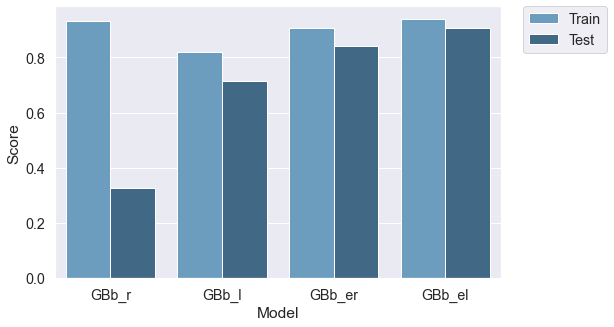

In [205]:
# r pour regular / l pour log / e pour EnergystarScore

datsiteE = [{'Model' : 'GBb_r', 'Set' : 'Train', 'Score' : GBb1rtrain},
          {'Model' : 'GBb_r', 'Set' : 'Test', 'Score' : GBb1rtest},
          {'Model' : 'GBb_l', 'Set' : 'Train', 'Score' : GBb1ltrain},
          {'Model' : 'GBb_l', 'Set' : 'Test', 'Score' : GBb1ltest},
          {'Model' : 'GBb_er', 'Set' : 'Train', 'Score' : GBb1ertrain},
          {'Model' : 'GBb_er', 'Set' : 'Test', 'Score' : GBb1ertest},
          {'Model' : 'GBb_el', 'Set' : 'Train', 'Score' : GBb1eltrain},
          {'Model' : 'GBb_el', 'Set' : 'Test', 'Score' : GBb1eltest},
]

evalsiteE = pd.DataFrame(datsiteE)

sns.set(font_scale = 1.3)
f = plt.figure(figsize=(8, 5))

ax = sns.barplot(x='Model', y="Score", hue='Set', data=evalsiteE, palette="Blues_d")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Emission CO2 V2

### modèle 1, même modèle qu'avec 'SiteEnergyUse(kBtu)'

In [262]:
machlj['Epred_b'] = GB_model_j8.predict(Xj1)

In [263]:
Xg_v2 = machlj
yg_v2l = machlj['logGHG']
yg_v2r = machlj['GHGEmissions(MetricTonsCO2e)']

Xgv2r_train, Xgv2r_test, ygv2r_train, ygv2r_test = \
    model_selection.train_test_split(Xg_v2, yg_v2r, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

Xgv2l_train, Xgv2l_test, ygv2l_train, ygv2l_test = \
    model_selection.train_test_split(Xg_v2, yg_v2l, 
                                    test_size=0.2, # 20% des données dans le jeu de test
                                    )

In [264]:
start = time.time()

cat_gv2_1 = ['Prop_Type']
num_gv2_1 = ['Age', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA', 'Second_Type']

prep_gv2_1 = make_column_transformer((numerical_pipeline, num_gv2_1), (categorical_pipeline, cat_gv2_1))

GB_model_gv2_1r = make_pipeline(prep_gv2_1, GradientBoostingRegressor())
GB_model_gv2_1l = make_pipeline(prep_gv2_1, GradientBoostingRegressor())

modelgb_gv2_1 = [GB_model_gv2_1r, GB_model_gv2_1l]
modelgbstr_gv2_1 = ['GB_model_gv2_1r', 'GB_model_gv2_1l']
Xj_trainloop_gv2_1 = [Xgv2r_train, Xgv2l_train]
yj_trainloop_gv2_1 = [ygv2r_train, ygv2l_train]

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]   
}

clf_gb_gv2_1 = []
best_clf_gb_gv2_1 = []

for i in range(len(modelgb_gv2_1)) :
    clf_gb_gv2_1.append(GridSearchCV(modelgb_gv2_1[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_gb_gv2_1.append(clf_gb_gv2_1[i].fit(Xj_trainloop_gv2_1[i], yj_trainloop_gv2_1[i]))
    
    print(clf_performance(best_clf_gb_gv2_1[i], modelgbstr_gv2_1[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   34.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GB_model_gv2_1r
Best Score: 0.40880939485894585
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 7, 'gradientboostingregressor__n_estimators': 70}
None
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   28.7s


GB_model_gv2_1l
Best Score: 0.530635710982118
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 8, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 100}
None
total time:  67.08703446388245 sec


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   32.2s finished


In [265]:
#r
GB_model_gv2_1rb = clf_gb_gv2_1[0].best_estimator_
GB_model_gv2_1rb.fit(Xgv2r_train, ygv2r_train)

ghg_v2_1r_train = GB_model_gv2_1rb.score(Xgv2r_train, ygv2r_train)
ghg_v2_1r_test = GB_model_gv2_1rb.score(Xgv2r_test, ygv2r_test)

#l
GB_model_gv2_1lb = clf_gb_gv2_1[1].best_estimator_
GB_model_gv2_1lb.fit(Xgv2l_train, ygv2l_train)

ghg_v2_1l_train = GB_model_gv2_1lb.score(Xgv2l_train, ygv2l_train)
ghg_v2_1l_test = GB_model_gv2_1lb.score(Xgv2l_test, ygv2l_test)

print('score sur train_reg :', ghg_v2_1r_train)
print('--'*5)
print('score sur test_reg :', ghg_v2_1r_test)
print('--'*10)
print('--'*10)
print('score sur train_log :', ghg_v2_1l_train)
print('--'*5)
print('score sur test_log :', ghg_v2_1l_test)

score sur train_reg : 0.9124975320677026
----------
score sur test_reg : 0.7822696167003813
--------------------
--------------------
score sur train_log : 0.6430788148813458
----------
score sur test_log : 0.5499750115110913


### modèle 2, uniquement avec la prediction sur 'SiteEnergyUse(kBtu)'

#### création de la variable "prédict" qui est la prédiction que l'on fait pour 'SiteEnergyUse(kBtu)'

In [266]:
start = time.time()

num_gv2_2 = ['Epred_b']
prep_gv2_2 = make_column_transformer((numerical_pipeline, num_gv2_2))

GB_model_gv2_2r = make_pipeline(prep_gv2_2, GradientBoostingRegressor())
GB_model_gv2_2l = make_pipeline(prep_gv2_2, GradientBoostingRegressor())

modelgb_gv2_2 = [GB_model_gv2_2r, GB_model_gv2_2l]
modelgbstr_gv2_2 = ['GB_model_gv2_2r', 'GB_model_gv2_2l']
Xj_trainloop_gv2_1 = [Xgv2r_train, Xgv2l_train]
yj_trainloop_gv2_1 = [ygv2r_train, ygv2l_train]

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]   
}

clf_gb_gv2_2 = []
best_clf_gb_gv2_2 = []

for i in range(len(modelgb_gv2_2)) :
    clf_gb_gv2_2.append(GridSearchCV(modelgb_gv2_2[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_gb_gv2_2.append(clf_gb_gv2_2[i].fit(Xj_trainloop_gv2_1[i], yj_trainloop_gv2_1[i]))
    
    print(clf_performance(best_clf_gb_gv2_2[i], modelgbstr_gv2_2[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GB_model_gv2_2r
Best Score: 0.4814853952563848
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 9, 'gradientboostingregressor__n_estimators': 70}
None
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:   14.6s


GB_model_gv2_2l
Best Score: 0.48970447314884585
Best Parameters: {'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__min_samples_split': 9, 'gradientboostingregressor__n_estimators': 70}
None
total time:  31.573610067367554 sec


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   15.6s finished


In [267]:
#r
GB_model_gv2_2rb = clf_gb_gv2_2[0].best_estimator_
GB_model_gv2_2rb.fit(Xgv2r_train, ygv2r_train)

ghg_v2_2r_train = GB_model_gv2_2rb.score(Xgv2r_train, ygv2r_train)
ghg_v2_2r_test = GB_model_gv2_2rb.score(Xgv2r_test, ygv2r_test)

#l
GB_model_gv2_2lb = clf_gb_gv2_2[1].best_estimator_
GB_model_gv2_2lb.fit(Xgv2l_train, ygv2l_train)

ghg_v2_2l_train = GB_model_gv2_2lb.score(Xgv2l_train, ygv2l_train)
ghg_v2_2l_test = GB_model_gv2_2lb.score(Xgv2l_test, ygv2l_test)

print('score sur train_reg :', ghg_v2_2r_train)
print('--'*5)
print('score sur test_reg :', ghg_v2_2r_test)
print('--'*10)
print('--'*10)
print('score sur train_log :', ghg_v2_2l_train)
print('--'*5)
print('score sur test_log :', ghg_v2_2l_test)

score sur train_reg : 0.9058705774024965
----------
score sur test_reg : 0.6281609119216928
--------------------
--------------------
score sur train_log : 0.5555229326782807
----------
score sur test_log : 0.5003151844349648


### modèle 3, prediction + % des types d'énergies

In [268]:
start = time.time()

num_gv2_3 = ['Epred_b', 'Steam(%)', 'Elec(%)', 'Gas(%)', 'Other(%)']
prep_gv2_3 = make_column_transformer((numerical_pipeline, num_gv2_3))

GB_model_gv2_3r = make_pipeline(prep_gv2_3, GradientBoostingRegressor())
GB_model_gv2_3l = make_pipeline(prep_gv2_3, GradientBoostingRegressor())

modelgb_gv2_3 = [GB_model_gv2_3r, GB_model_gv2_3l]
modelgbstr_gv2_3 = ['GB_model_gv2_3r', 'GB_model_gv2_3l']
Xj_trainloop_gv2_1 = [Xgv2r_train, Xgv2l_train]
yj_trainloop_gv2_1 = [ygv2r_train, ygv2l_train]

params = {
    'gradientboostingregressor__criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'gradientboostingregressor__n_estimators' : [70, 100, 130],
    'gradientboostingregressor__min_samples_leaf' : [1, 2, 3, 5,6,8],
    'gradientboostingregressor__min_samples_split' : [2,4, 7, 8, 9]   
}

clf_gb_gv2_3 = []
best_clf_gb_gv2_3 = []

for i in range(len(modelgb_gv2_3)) :
    clf_gb_gv2_3.append(GridSearchCV(modelgb_gv2_3[i], param_grid = params, cv = KFold(5), verbose = True, n_jobs = -1))
    best_clf_gb_gv2_3.append(clf_gb_gv2_3[i].fit(Xj_trainloop_gv2_1[i], yj_trainloop_gv2_1[i]))
    
    print(clf_performance(best_clf_gb_gv2_3[i], modelgbstr_gv2_3[i]))

end = time.time()
print("total time: ",(end - start),"sec")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1343 out of 1350 | elapsed:   24.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   24.7s finished


GB_model_gv2_3r
Best Score: 0.7828194038707857
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 9, 'gradientboostingregressor__n_estimators': 100}
None
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1343 out of 1350 | elapsed:   24.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   24.7s finished


GB_model_gv2_3l
Best Score: 0.8002456098020865
Best Parameters: {'gradientboostingregressor__criterion': 'mse', 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__min_samples_split': 9, 'gradientboostingregressor__n_estimators': 130}
None
total time:  49.88036847114563 sec


In [269]:
#r
GB_model_gv2_3rb = clf_gb_gv2_3[0].best_estimator_
GB_model_gv2_3rb.fit(Xgv2r_train, ygv2r_train)

ghg_v2_3r_train = GB_model_gv2_3rb.score(Xgv2r_train, ygv2r_train)
ghg_v2_3r_test = GB_model_gv2_3rb.score(Xgv2r_test, ygv2r_test)

#l
GB_model_gv2_3lb = clf_gb_gv2_3[1].best_estimator_
GB_model_gv2_3lb.fit(Xgv2l_train, ygv2l_train)

ghg_v2_3l_train = GB_model_gv2_3lb.score(Xgv2l_train, ygv2l_train)
ghg_v2_3l_test = GB_model_gv2_3lb.score(Xgv2l_test, ygv2l_test)

print('score sur train_reg :', ghg_v2_3r_train)
print('--'*5)
print('score sur test_reg :', ghg_v2_3r_test)
print('--'*10)
print('--'*10)
print('score sur train_log :', ghg_v2_3l_train)
print('--'*5)
print('score sur test_log :', ghg_v2_3l_test)

score sur train_reg : 0.9738923708916185
----------
score sur test_reg : 0.8379999008715053
--------------------
--------------------
score sur train_log : 0.8569698331243227
----------
score sur test_log : 0.7735772361973103


In [270]:
datghg_v2 = [{'Model' : 'GraB_1r', 'Type' : 'Reg', 'Set' : 'Train', 'Score' : ghg_v2_1r_train},
          {'Model' : 'GraB_1r', 'Type' : 'Reg' ,'Set' : 'Test', 'Score' : ghg_v2_1r_test},
          {'Model' : 'GraB_1l', 'Type' : 'Log', 'Set' : 'Train', 'Score' : ghg_v2_1l_train},
          {'Model' : 'GraB_1l', 'Type' : 'Log' ,'Set' : 'Test', 'Score' : ghg_v2_1l_test},
          {'Model' : 'GraB_2r', 'Type' : 'Reg', 'Set' : 'Train', 'Score' : ghg_v2_2r_train},
          {'Model' : 'GraB_2r', 'Type' : 'Reg' ,'Set' : 'Test', 'Score' : ghg_v2_2r_test},
          {'Model' : 'GraB_2l', 'Type' : 'Log', 'Set' : 'Train', 'Score' : ghg_v2_2l_train},
          {'Model' : 'GraB_2l', 'Type' : 'Log' ,'Set' : 'Test', 'Score' : ghg_v2_2l_test},
          {'Model' : 'GraB_3r', 'Type' : 'Reg', 'Set' : 'Train', 'Score' : ghg_v2_3r_train},
          {'Model' : 'GraB_3r', 'Type' : 'Reg' ,'Set' : 'Test', 'Score' : ghg_v2_3r_test},
          {'Model' : 'GraB_3l', 'Type' : 'Log', 'Set' : 'Train', 'Score' : ghg_v2_3l_train},
          {'Model' : 'GraB_3l', 'Type' : 'Log' ,'Set' : 'Test', 'Score' : ghg_v2_3l_test}
]

evalghg_v2 = pd.DataFrame(datghg_v2)

# sns.set(font_scale = 1.3)
# f = plt.figure(figsize=(12, 5))

# ax = sns.barplot(x='Model', y="Score", hue='Set', data=evalghg_v2, palette="Blues_d")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

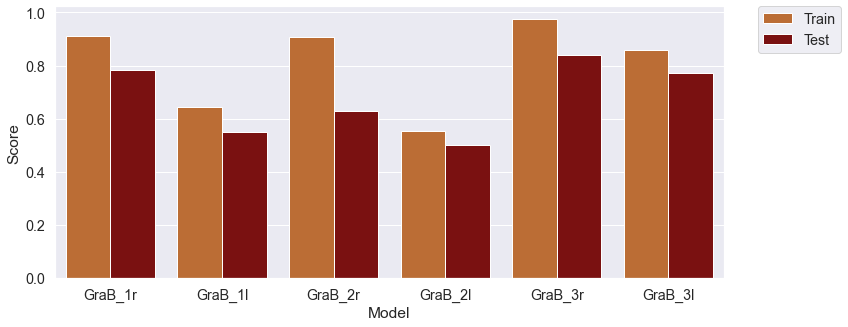

In [271]:
# Create an array with the colors you want to use
colors = ["chocolate", "darkred"]
# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))

sns.set(font_scale = 1.3)
f = plt.figure(figsize=(12, 5))

ax = sns.barplot(x='Model', y="Score", hue='Set', data=evalghg_v2, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Attention a de fortes variations en fonction du découpage du set